In [1]:
%run ../../connection.python.py

In [ ]:
path_golden_generico =  "/user/emma.cambieri/TRIPLETTA_GOLDEN_SET/golden_generico.parquet"
path_model_generico = "/user/matteo.ballerinipuviani/PREDICTIONSDIGITALIZZAZIONE/model_generici_def.parquet"

In [2]:
golden_train = spark.read.format('parquet').load(path_golden_generico).persist()

In [3]:
golden_train.count()

2407826

In [3]:
golden_train = golden_train.drop('totale_visite',  'numero_mesi_corporate', 'numero_mesi_tg24', 'numero_mesi_sport', 'numero_mesi_appwsc',  'numero_mesi_appgtv', 'numero_mesi_appsport', 'numero_mesi_appxfactor', 'visite_totali_corporate',  'visite_totali_tg24', 'visite_totali_sport', 'visite_totali_appwsc', 'visite_totali_appgtv', 'visite_totali_appsport', 'visite_totali_appxfactor',  'cookie_corporate', 'cookie_tg24' , 'cookie_sport' , 'secondi_totali_corporate'
 , 'secondi_totali_tg24' , 'secondi_totali_sport' , 'secondi_totali_appwsc' , 'secondi_totali_appgtv' , 'secondi_totali_appsport' , 'secondi_totali_appxfactor' , 'visite_corporate_appwsc_appgtv'
 , 'visite_editoriale' , 'visite_web' , 'visite_app', 'max_mesi_corporate_appwsc_appgtv' , 'max_mesi_editoriale' , 'max_mesi_web' , 'max_mesi_app' , 'secondi_corporate_appwsc_appgtv'
 , 'secondi_editoriale' , 'secondi_web' , 'secondi_app', 'score_utilizzo',  'visite_settimana_corporate'
 , 'visite_weekend_corporate'
 , 'visite_settimana_tg24'
 , 'visite_weekend_tg24'
 , 'visite_settimana_sport'
 , 'visite_weekend_sport'
 , 'visite_settimana_appwsc'
 , 'visite_weekend_appwsc'
 , 'visite_settimana_appgtv'
 , 'visite_weekend_appgtv'
 , 'visite_settimana_appsport'
 , 'visite_weekend_appsport'
 , 'visite_settimana_appxfactor'
 , 'visite_weekend_appxfactor'
 , 'visite_corporate_notte'
 , 'visite_corporate_mattina'
 , 'visite_corporate_pomeriggio'
 , 'visite_corporate_sera'
 , 'visite_tg24_notte'
 , 'visite_tg24_mattina'
 , 'visite_tg24_pomeriggio'
 , 'visite_tg24_sera'
 , 'visite_sport_notte'
 , 'visite_sport_mattina'
 , 'visite_sport_pomeriggio'
 , 'visite_sport_sera'
 , 'visite_appwsc_notte'
 , 'visite_appwsc_mattina'
 , 'visite_appwsc_pomeriggio'
 , 'visite_appwsc_sera'
 , 'visite_appgtv_notte'
 , 'visite_appgtv_mattina'
 , 'visite_appgtv_pomeriggio'
 , 'visite_appgtv_sera'
 , 'visite_appsport_notte'
 , 'visite_appsport_mattina'
 , 'visite_appsport_pomeriggio'
 , 'visite_appsport_sera'
 , 'visite_appxfactor_notte'
 , 'visite_appxfactor_mattina'
 , 'visite_appxfactor_pomeriggio'
 , 'visite_appxfactor_sera' ) 

In [5]:
golden_train.show(10)

+--------------------+------------------+---------------+-------------+-------------+---------------+-----------------+-------------------+--------------------+------------------+--------------+------------------------+--------------+----------------------+-----------------+------------------+-------------------+-------------------+---------------------+-----------------------+------------------+-------------------+-----------------+-----------------------------+------------------------+-------------------------+--------------------------+--------------------------+----------------------------+------------------------------+--------------------+---------------+----------------+-----------------+-----------------+-------------------+---------------------+-----------------+---------------------------------------+--------------------------+-------------------+-------------------+-------------------------------+------------------+------------------+-----------------+-----------------------

In [6]:
#golden_train = golden_train.fillna(0)

In [4]:
print(len(golden_train.columns))

52


In [5]:
golden_train.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_reportsuite: double (nullable = true)
 |-- cookie_skyitdev: long (nullable = true)
 |-- cookie_appwsc: long (nullable = true)
 |-- cookie_appgtv: long (nullable = true)
 |-- cookie_appsport: long (nullable = true)
 |-- cookie_appxfactor: long (nullable = true)
 |-- count_visits_mobile: long (nullable = true)
 |-- count_visits_desktop: long (nullable = true)
 |-- count_visits_other: long (nullable = true)
 |-- tipo_device: string (nullable = true)
 |-- count_visits_from_social: long (nullable = true)
 |-- social_network: string (nullable = true)
 |-- media_visite_corporate: double (nullable = true)
 |-- media_visite_tg24: double (nullable = true)
 |-- media_visite_sport: double (nullable = true)
 |-- media_visite_appwsc: double (nullable = true)
 |-- media_visite_appgtv: double (nullable = true)
 |-- media_visite_appsport: double (nullable = true)
 |-- media_visite_appxfactor: double (nullable = true)
 |-- percentuale_mobile: double

In [6]:
string_columns= ["social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale"]
for c in string_columns:
    golden_train = golden_train.withColumn(c, golden_train[c].cast('string'))

avg_columns= ["media_visite_corporate","media_visite_tg24", "media_visite_sport",
                    "media_visite_appgtv","media_visite_appxfactor","media_visite_appsport","media_visite_appwsc",
                    "avg_visite_mese_web", "percentuale_mobile",
                    "percentuale_desktop", "percentuale_other", "durata_media_visite_corporate", "durata_media_visite_tg24",
                     "durata_media_visite_sport", "durata_media_visite_appgtv", "durata_media_visite_appxfactor", "durata_media_visite_appsport",
                    "durata_media_visite_appwsc", "avg_visite_mese_corporate_appwsc_appgtv", "avg_visite_mese_editoriale", "avg_visite_mese_app",
                     "avg_sec_corporate_appwsc_appgtv","avg_sec_editoriale", "avg_sec_web", "avg_sec_app"]

for cols in avg_columns:
    golden_train= golden_train.withColumn(cols, golden_train[cols].cast('float'))
        
integ_columns = golden_train.drop("ext_id","social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale", "media_visite_corporate","media_visite_tg24", "media_visite_sport",
                    "media_visite_appgtv","media_visite_appxfactor","media_visite_appsport","media_visite_appwsc",
                    "avg_visite_mese_web", "percentuale_mobile",
                    "percentuale_desktop", "percentuale_other", "durata_media_visite_corporate", "durata_media_visite_tg24",
                     "durata_media_visite_sport", "durata_media_visite_appgtv", "durata_media_visite_appxfactor", "durata_media_visite_appsport",
                    "durata_media_visite_appwsc", "avg_visite_mese_corporate_appwsc_appgtv", "avg_visite_mese_editoriale", "avg_visite_mese_app",
                     "avg_sec_corporate_appwsc_appgtv", "avg_sec_editoriale", "avg_sec_web", "avg_sec_app", "score_digital").columns


for col_int in integ_columns:
  golden_train = golden_train.withColumn(col_int,golden_train[col_int].cast("integer"))

golden_train.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_reportsuite: integer (nullable = true)
 |-- cookie_skyitdev: integer (nullable = true)
 |-- cookie_appwsc: integer (nullable = true)
 |-- cookie_appgtv: integer (nullable = true)
 |-- cookie_appsport: integer (nullable = true)
 |-- cookie_appxfactor: integer (nullable = true)
 |-- count_visits_mobile: integer (nullable = true)
 |-- count_visits_desktop: integer (nullable = true)
 |-- count_visits_other: integer (nullable = true)
 |-- tipo_device: string (nullable = true)
 |-- count_visits_from_social: integer (nullable = true)
 |-- social_network: string (nullable = true)
 |-- media_visite_corporate: float (nullable = true)
 |-- media_visite_tg24: float (nullable = true)
 |-- media_visite_sport: float (nullable = true)
 |-- media_visite_appwsc: float (nullable = true)
 |-- media_visite_appgtv: float (nullable = true)
 |-- media_visite_appsport: float (nullable = true)
 |-- media_visite_appxfactor: float (nullable = true)
 |-- perce

In [7]:
prova= golden_train.filter('score_digital == 0 or score_digital == 1')
print(str("train dataset 0 and 1:"), prova.count()) #346.124

prova0= golden_train.filter('score_digital == 0')
print(str("train dataset 0:"), prova0.count()) #184.074

prova1= golden_train.filter('score_digital == 1')
print(str("train dataset 1:"), prova1.count()) #162.050

train dataset 0 and 1: 349217
train dataset 0: 184074
train dataset 1: 165143


In [12]:
# TEST:
#path_golden_set_genn_giu = "/user/emma.cambieri/TEST_1_0_null_genn_giu.parquet"
#testData = spark.read.format('parquet').load(path_golden_set_genn_giu).persist()

In [8]:
testData= golden_train.filter('score_digital == 1 or score_digital is null')

In [14]:
testData.count() # 2.223.752

2223752

In [9]:
testData = testData.drop('totale_visite',  'numero_mesi_corporate', 'numero_mesi_tg24', 'numero_mesi_sport', 'numero_mesi_appwsc',  'numero_mesi_appgtv', 'numero_mesi_appsport', 'numero_mesi_appxfactor', 'visite_totali_corporate',  'visite_totali_tg24', 'visite_totali_sport', 'visite_totali_appwsc', 'visite_totali_appgtv', 'visite_totali_appsport', 'visite_totali_appxfactor',  'cookie_corporate', 'cookie_tg24' , 'cookie_sport' , 'secondi_totali_corporate'
 , 'secondi_totali_tg24' , 'secondi_totali_sport' , 'secondi_totali_appwsc' , 'secondi_totali_appgtv' , 'secondi_totali_appsport' , 'secondi_totali_appxfactor' , 'visite_corporate_appwsc_appgtv'
 , 'visite_editoriale' , 'visite_web' , 'visite_app' , 'max_mesi_corporate_appwsc_appgtv' , 'max_mesi_editoriale' , 'max_mesi_web' , 'max_mesi_app' , 'secondi_corporate_appwsc_appgtv'
 , 'secondi_editoriale' , 'secondi_web' , 'secondi_app', 'score_utilizzo',  'visite_settimana_corporate'
 , 'visite_weekend_corporate'
 , 'visite_settimana_tg24'
 , 'visite_weekend_tg24'
 , 'visite_settimana_sport'
 , 'visite_weekend_sport'
 , 'visite_settimana_appwsc'
 , 'visite_weekend_appwsc'
 , 'visite_settimana_appgtv'
 , 'visite_weekend_appgtv'
 , 'visite_settimana_appsport'
 , 'visite_weekend_appsport'
 , 'visite_settimana_appxfactor'
 , 'visite_weekend_appxfactor'
 , 'visite_corporate_notte'
 , 'visite_corporate_mattina'
 , 'visite_corporate_pomeriggio'
 , 'visite_corporate_sera'
 , 'visite_tg24_notte'
 , 'visite_tg24_mattina'
 , 'visite_tg24_pomeriggio'
 , 'visite_tg24_sera'
 , 'visite_sport_notte'
 , 'visite_sport_mattina'
 , 'visite_sport_pomeriggio'
 , 'visite_sport_sera'
 , 'visite_appwsc_notte'
 , 'visite_appwsc_mattina'
 , 'visite_appwsc_pomeriggio'
 , 'visite_appwsc_sera'
 , 'visite_appgtv_notte'
 , 'visite_appgtv_mattina'
 , 'visite_appgtv_pomeriggio'
 , 'visite_appgtv_sera'
 , 'visite_appsport_notte'
 , 'visite_appsport_mattina'
 , 'visite_appsport_pomeriggio'
 , 'visite_appsport_sera'
 , 'visite_appxfactor_notte'
 , 'visite_appxfactor_mattina'
 , 'visite_appxfactor_pomeriggio'
 , 'visite_appxfactor_sera', 'score_digital')

In [10]:
print(len(testData.columns))

51


In [11]:
col_test = testData.columns
col_golden_train = golden_train.columns

print(len(set(col_test).intersection(col_golden_train)))

51


In [12]:
string_columns= ["social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale"]
for c in string_columns:
    testData = testData.withColumn(c, testData[c].cast('string'))

avg_columns= ["media_visite_corporate","media_visite_tg24", "media_visite_sport",
                    "media_visite_appgtv","media_visite_appxfactor","media_visite_appsport","media_visite_appwsc",
                    "avg_visite_mese_web", "percentuale_mobile",
                    "percentuale_desktop", "percentuale_other", "durata_media_visite_corporate", "durata_media_visite_tg24",
                     "durata_media_visite_sport", "durata_media_visite_appgtv", "durata_media_visite_appxfactor", "durata_media_visite_appsport",
                    "durata_media_visite_appwsc", "avg_visite_mese_corporate_appwsc_appgtv", "avg_visite_mese_editoriale", "avg_visite_mese_app",
                     "avg_sec_corporate_appwsc_appgtv","avg_sec_editoriale", "avg_sec_web", "avg_sec_app"]

for cols in avg_columns:
    testData= testData.withColumn(cols, testData[cols].cast('float'))
        
integ_columns = testData.drop("ext_id","social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale", "media_visite_corporate","media_visite_tg24", "media_visite_sport",
                    "media_visite_appgtv","media_visite_appxfactor","media_visite_appsport","media_visite_appwsc",
                    "avg_visite_mese_web", "percentuale_mobile",
                    "percentuale_desktop", "percentuale_other", "durata_media_visite_corporate", "durata_media_visite_tg24",
                     "durata_media_visite_sport", "durata_media_visite_appgtv", "durata_media_visite_appxfactor", "durata_media_visite_appsport",
                    "durata_media_visite_appwsc", "avg_visite_mese_corporate_appwsc_appgtv", "avg_visite_mese_editoriale", "avg_visite_mese_app",
                     "avg_sec_corporate_appwsc_appgtv", "avg_sec_editoriale", "avg_sec_web", "avg_sec_app").columns


for col_int in integ_columns:
  testData = testData.withColumn(col_int,testData[col_int].cast("integer"))

#testData.printSchema()

In [13]:
#Import useful packages:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator, RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import OneHotEncoder

### Train, validation and test dataset

In [14]:
#0 da escludere dal training:
golden_train_0_esclusi = golden_train.filter('score_digital == 0')

In [15]:
golden_train_0_esclusi.count() #184.074

184074

In [16]:
#nuovo golden_train, senza gli 0:
golden_train_1_e_null =golden_train.filter('score_digital == 1 or score_digital is null')

In [17]:
golden_train_1_e_null.count() #2.223.752

2223752

In [18]:
golden_train1 = golden_train.filter('score_digital==1')

In [25]:
#golden_train1.count() #165143

In [26]:
#(golden_train1_70, golden_train1_30) = golden_train1.randomSplit([0.7,0.3], seed=2)

In [19]:
0.7*golden_train1.count()/0.3

385333.6666666666

In [25]:
#golden_train1_30.count()

49530

In [26]:
#golden_train1_70.count() #115.613

115613

In [20]:
golden_train_null = golden_train.filter('score_digital is null')

In [29]:
golden_train_null.count()

2058609

In [21]:
golden_train0_70 = golden_train_null.limit(385334)

In [31]:
golden_train0_70.count()

385334

In [22]:
golden_train1_30 = golden_train1

In [23]:
golden_train1_30.createOrReplaceTempView('golden_train1_30')
golden_train0_70.createOrReplaceTempView('golden_train0_70')


In [24]:
# 80% zeri e 20% uni
golden_train0e1 = spark.sql('select * from golden_train1_30 union all select * from golden_train0_70 ')

In [25]:
golden_train0e1.count()

550477

In [26]:
golden_train0e1 = golden_train0e1.fillna(0)

In [27]:
steps =[]
CategoricalCol_in = ["social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale"]
CategoricalCol_out = [ "social_network_class_vec", "tipo_device_class_vec", "ricorrenza_corporate_class_vec", "ricorrenza_tg24_class_vec", "ricorrenza_sport_class_vec",
                      "ricorrenza_appgtv_class_vec", "ricorrenza_appxfactor_class_vec", "ricorrenza_appsport_class_vec", "ricorrenza_appwsc_class_vec",
                      "ricorrenza_corporate_appwsc_appgtv_class_vec", "ricorrenza_editoriale_class_vec", "ricorrenza_web_class_vec", "ricorrenza_app_class_vec",
                      "ricorrenza_totale_class_vec"]
 
indexers = [StringIndexer(inputCol=x, outputCol=x+'Index')
            for x in CategoricalCol_in ]
 
encoders = [OneHotEncoder(dropLast=False, inputCol=x+"Index", outputCol=y)
for x,y in zip(CategoricalCol_in, CategoricalCol_out)]
steps = [[i,j] for i,j in zip(indexers, encoders)]
steps = [i for sublist in steps for i in sublist]

# Convert label into label indices using the StringIndexer
label_stringIdx = StringIndexer(inputCol="score_digital", outputCol="label")
#stages += [label_stringIdx]

numericCols = golden_train0e1.drop("ext_id", "score_digital","social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale").columns

assemblerInputs = [c + "_class_vec" for c in CategoricalCol_in] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
steps += [assembler, label_stringIdx]

#Pipeline:  
pipeline = Pipeline().setStages(steps)

In [28]:
# Applico pipeline a golden_train:
pipelineModel = pipeline.fit(golden_train0e1)
train = pipelineModel.transform(golden_train0e1)

In [29]:
(training, validation) = train.randomSplit([0.8, 0.2], seed=1)

In [30]:
training_0 = training.filter('score_digital == 0')
righe_training_0 = training_0.count()

#training_1 = training.filter('score_digital == 1')
#print (training_1.count())

print ("percentuale 0 training:", righe_training_0/training.count())
#print ("percentuale 1 training:", training_1.count()/training.count())

#validation_0 = validation.filter('score_digital == 0')
#righe_validation_0 = validation_0.count()

#validation_1 = validation.filter('score_digital == 1')
#print (validation_1.count())

#print ("percentuale 0 validation:", righe_validation_0/validation.count())
#print ("percentuale 1 validation:", validation_1.count()/validation.count())


percentuale 0 training: 0.7003900060385102


## Classification:

In [31]:
#Creo il modello:
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=50, maxDepth = 5, seed=2)

In [ ]:
#Ottengo la spiegazione di tutti i parametri:
#print(rf.explainParams())

In [32]:
# Run model:
model = rf.fit(training)
#predictions_class = model.transform(validation)

In [33]:
model.save("/user/matteo.ballerinipuviani/PREDICTIONSDIGITALIZZAZIONE/model_generici_def.parquet")

In [43]:
# Print degli alberi:
print(model.toDebugString)

RandomForestClassificationModel (uid=rfc_c3448d901779) with 50 trees
  Tree 0 (weight 1.0):
    If (feature 68 <= 8.0)
     If (feature 43 <= 1.0)
      If (feature 65 <= 0.7142857313156128)
       If (feature 68 <= 4.0)
        Predict: 0.0
       Else (feature 68 > 4.0)
        If (feature 51 <= 0.5299999713897705)
         Predict: 0.0
        Else (feature 51 > 0.5299999713897705)
         Predict: 0.0
      Else (feature 65 > 0.7142857313156128)
       If (feature 34 <= 6.0)
        Predict: 0.0
       Else (feature 34 > 6.0)
        Predict: 1.0
     Else (feature 43 > 1.0)
      If (feature 50 <= 0.6000000238418579)
       If (feature 40 <= 6.0)
        If (feature 46 <= 0.0)
         Predict: 0.0
        Else (feature 46 > 0.0)
         Predict: 0.0
       Else (feature 40 > 6.0)
        If (feature 61 <= 0.0)
         Predict: 0.0
        Else (feature 61 > 0.0)
         Predict: 0.0
      Else (feature 50 > 0.6000000238418579)
       If (feature 50 <= 0.9700000286102295)
    

In [44]:
# Select example rows to display.
predictions_class.select("label", 'prediction').show(10, False)

+-----+----------+
|label|prediction|
+-----+----------+
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
|1.0  |1.0       |
+-----+----------+
only showing top 10 rows



In [45]:
evaluator = BinaryClassificationEvaluator()
evaluator.evaluate(predictions_class)

0.999953564008825

In [ ]:
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_class)
print("Test Error = %g" % (1.0 - accuracy))

#rfModel = model.stages[2]
#print(rfModel)  # summary only

In [ ]:
# Select (prediction, true label) and compute test error
evaluator = BinaryClassificationEvaluator(
    labelCol="label", rawPredictionCol="predictions_class")
auc = evaluator.evaluate(predictions)
print(auc)

### Test finale:

In [46]:
importance_class= model.featureImportances
print(importance_class)

(69,[0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68],[0.000276631230082,2.71001257507e-07,0.000143079528149,0.00126734664949,0.00336442339939,0.00472210135445,4.04140816181e-06,4.36085597078e-07,0.000371698952317,0.000938132590089,3.15314902012e-07,0.000358765181653,0.00484401430281,0.00178019776163,0.00288188788688,2.40571524528e-07,1.27765570826e-05,0.00203598330916,0.00327295069126,0.0252934597856,0.045458990579,0.0199571591663,0.00523926577309,0.0247571501835,0.0193160712175,0.00801172973065,0.0192325849052,0.0479816008136,0.079306228361,0.00198452768743,0.34008450365,0.000906850419226,3.79023203205e-07,0.00792959037803,0.0489937665122,0.00640275218297,1.27897440514e-06,0.0489715216966,3.28264934905e-05,0.0011811206747,0.0014047224145,5.49079275786e-05,3.61137537082e-06,0.00879002152636,0.00337892203698,0.00239348185048,0.00218881478303,6.16742931029e-06

In [47]:
import pandas as pd
def ExtractFeatureImp(featureImp, dataset, featuresCol):
    list_extract = []
    for i in dataset.schema[featuresCol].metadata["ml_attr"]["attrs"]:
        list_extract = list_extract + dataset.schema[featuresCol].metadata["ml_attr"]["attrs"][i]
    varlist = pd.DataFrame(list_extract)
    varlist['score'] = varlist['idx'].apply(lambda x: featureImp[x])
    return(varlist.sort_values('score', ascending = False))

In [48]:
#CLASSIFICATION. FEATURE IMPORTANCE
ExtractFeatureImp(importance_class, training, "features").head(50)

,idx,name,score
1,34,cookie_skyitdev,0.340085
35,68,percentile_score_utilizzo,0.106133
68,32,ricorrenza_totale_class_vec_ricorrente,0.079306
27,60,avg_visite_mese_corporate_appwsc_appgtv,0.062929
7,40,count_visits_desktop,0.048994
10,43,media_visite_corporate,0.048972
67,31,ricorrenza_totale_class_vec_non ricorrente,0.047982
60,24,ricorrenza_corporate_appwsc_appgtv_class_vec_1.0,0.045459
59,23,ricorrenza_corporate_appwsc_appgtv_class_vec_0.0,0.025293
63,27,ricorrenza_web_class_vec_0.0,0.024757


In [49]:
steps1 =[]
CategoricalCol_in = ["social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale"]
CategoricalCol_out = [ "social_network_class_vec", "tipo_device_class_vec", "ricorrenza_corporate_class_vec", "ricorrenza_tg24_class_vec", "ricorrenza_sport_class_vec",
                      "ricorrenza_appgtv_class_vec", "ricorrenza_appxfactor_class_vec", "ricorrenza_appsport_class_vec", "ricorrenza_appwsc_class_vec",
                      "ricorrenza_corporate_appwsc_appgtv_class_vec", "ricorrenza_editoriale_class_vec", "ricorrenza_web_class_vec", "ricorrenza_app_class_vec",
                      "ricorrenza_totale_class_vec"]
 
indexers = [StringIndexer(inputCol=x, outputCol=x+'Index')
            for x in CategoricalCol_in ]
 
encoders = [OneHotEncoder(dropLast=False, inputCol=x+"Index", outputCol=y)
for x,y in zip(CategoricalCol_in, CategoricalCol_out)]
steps1 = [[i,j] for i,j in zip(indexers, encoders)]
steps1 = [i for sublist in steps1 for i in sublist]

numericCols = testData.drop("ext_id","social_network", "tipo_device", "ricorrenza_corporate", "ricorrenza_tg24", "ricorrenza_sport",
                      "ricorrenza_appgtv", "ricorrenza_appxfactor", "ricorrenza_appsport", "ricorrenza_appwsc",
                      "ricorrenza_corporate_appwsc_appgtv", "ricorrenza_editoriale", "ricorrenza_web", "ricorrenza_app",
                      "ricorrenza_totale").columns

assemblerInputs = [c + "_class_vec" for c in CategoricalCol_in] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
steps1 += [assembler]

#Pipeline:  
pipeline1 = Pipeline().setStages(steps1)

In [ ]:
#testData = testData.fillna(0)

In [50]:
# Applico pipeline a test:
pipelineModel_final = pipeline1.fit(testData)
final= pipelineModel_final.transform(testData)

In [51]:
predictions_class_test = model.transform(final)

In [52]:
from pyspark.ml.feature import VectorSlicer

slicer = VectorSlicer(inputCol="probability", outputCol="prob_1", indices=[1])

predictions_class_test = slicer.transform(predictions_class_test)

predictions_class_test.select("probability", "prob_1").show()

+--------------------+--------------------+
|         probability|              prob_1|
+--------------------+--------------------+
|[0.96843338325938...|[0.03156661674061...|
|[0.97047811616353...|[0.02952188383646...|
|[0.88057172001476...|[0.11942827998523...|
|[0.98142044221978...|[0.01857955778021...|
|[0.36039202784177...|[0.6396079721582293]|
|[0.95023116993278...|[0.04976883006721...|
|[0.91540947075662...|[0.08459052924337...|
|[0.00168480336098...|[0.9983151966390177]|
|[0.98313229011288...|[0.01686770988711...|
|[0.99442594794181...|[0.00557405205818...|
|[0.99273954562941...|[0.00726045437058...|
|[0.95442547575777...|[0.04557452424222...|
|[0.98018691043151...|[0.01981308956848...|
|[0.97411124613042...|[0.02588875386957...|
|[0.99303906881038...|[0.00696093118961...|
|[0.99245783046678...|[0.00754216953321...|
|[0.91470374609808...|[0.08529625390191...|
|[0.88637637491088...|[0.11362362508911...|
|[0.77551005281146...|[0.22448994718853...|
|[0.98211307516873...|[0.0178869

In [51]:
predictions_class_test.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_reportsuite: integer (nullable = true)
 |-- cookie_skyitdev: integer (nullable = true)
 |-- cookie_appwsc: integer (nullable = true)
 |-- cookie_appgtv: integer (nullable = true)
 |-- cookie_appsport: integer (nullable = true)
 |-- cookie_appxfactor: integer (nullable = true)
 |-- count_visits_mobile: integer (nullable = true)
 |-- count_visits_desktop: integer (nullable = true)
 |-- count_visits_other: integer (nullable = true)
 |-- tipo_device: string (nullable = true)
 |-- count_visits_from_social: integer (nullable = true)
 |-- social_network: string (nullable = true)
 |-- media_visite_corporate: float (nullable = true)
 |-- media_visite_tg24: float (nullable = true)
 |-- media_visite_sport: float (nullable = true)
 |-- media_visite_appwsc: float (nullable = true)
 |-- media_visite_appgtv: float (nullable = true)
 |-- media_visite_appsport: float (nullable = true)
 |-- media_visite_appxfactor: float (nullable = true)
 |-- perce

In [53]:
predictions_class_test.createOrReplaceTempView('class')

In [54]:
probab_class = spark.sql('SELECT prob_1, COUNT(features) as count_ext_id FROM class GROUP BY prob_1 ORDER BY count_ext_id DESC')

In [55]:
# CLASSIFICATION: DISTRIBUTION OF PROBABILITY
probab_class.show(1000, False)

+-----------------------+------------+
|prob_1                 |count_ext_id|
+-----------------------+------------+
|[0.023551187666379505] |58485       |
|[0.005574052058187729] |55767       |
|[0.025888753869579503] |52383       |
|[0.0068677913006641965]|49493       |
|[0.010113182566625434] |29557       |
|[0.005629071809126885] |26172       |
|[0.023948260137908076] |22636       |
|[0.016302467839035734] |19625       |
|[0.01689315546781624]  |17368       |
|[0.022960500037599]    |14346       |
|[0.007260454370582617] |14018       |
|[0.011938729418517703] |11886       |
|[0.0270053110569326]   |11253       |
|[0.024667744853732597] |10797       |
|[0.02549168139805093]  |9902        |
|[0.006910303223758689] |9133        |
|[0.05447099437390624]  |8836        |
|[0.017682891009263235] |8334        |
|[0.005364388118454302] |7891        |
|[0.005672358382273177] |7247        |
|[0.005966715128106149] |6537        |
|[0.006196237291747386] |5854        |
|[0.053859039419200706] |

In [56]:
probab_class = spark.sql('SELECT prob_1, COUNT(features) as count_ext_id FROM class GROUP BY prob_1 ORDER BY prob_1 DESC')

In [58]:
probab_class.show(1000, False)

+--------------------+------------+
|prob_1              |count_ext_id|
+--------------------+------------+
|[0.9999847251140425]|12          |
|[0.9999817787380849]|5           |
|[0.9999804914137884]|47          |
|[0.9999788962974192]|3           |
|[0.9999788026976967]|1           |
|[0.9999776915286723]|3           |
|[0.9999776089731227]|6           |
|[0.9999766443059618]|1           |
|[0.9999766230277553]|2           |
|[0.9999758563217391]|2           |
|[0.9999747451527148]|1           |
|[0.9999745689974426]|5           |
|[0.9999737405870895]|1           |
|[0.9999734578284183]|8           |
|[0.9999717691123264]|1           |
|[0.9999710333602558]|24          |
|[0.9999707006114095]|1           |
|[0.9999695894423851]|1           |
|[0.9999688227363689]|1           |
|[0.9999681509195902]|8           |
|[0.9999675354120724]|5           |
|[0.9999669788851162]|10          |
|[0.9999668878788139]|11          |
|[0.9999656314230941]|1           |
|[0.9999651109439099]|3     

In [60]:
probab_class_prediction = spark.sql('SELECT prediction, COUNT(features) as count_ext_id FROM class GROUP BY prediction ORDER BY count_ext_id DESC')

In [61]:
probab_class_prediction.show(1000, False)

+----------+------------+
|prediction|count_ext_id|
+----------+------------+
|0.0       |2057401     |
|1.0       |166351      |
+----------+------------+



### Creation of quantiles for column prob_1:

In [62]:
predictions_class_test.select("ext_id", "prob_1").show()

+--------------------+--------------------+
|              ext_id|              prob_1|
+--------------------+--------------------+
|0005f3f18bda8a53a...|[0.03156661674061...|
|0006530d860a31ca2...|[0.02952188383646...|
|000aec8698c204eca...|[0.11942827998523...|
|000effd99733aebfe...|[0.01857955778021...|
|000fd3e0c929462b3...|[0.6396079721582293]|
|001516de23bee4c89...|[0.04976883006721...|
|001a2224a6e43beef...|[0.08459052924337...|
|001e2193b90bffb5b...|[0.9983151966390177]|
|0026ea7fa4c588c71...|[0.01686770988711...|
|0028e80ef65484c56...|[0.00557405205818...|
|002bd395a3f7ca4ec...|[0.00726045437058...|
|003146d8bef6285ab...|[0.04557452424222...|
|0034732e24e76cc3a...|[0.01981308956848...|
|003bd909360cc50de...|[0.02588875386957...|
|003f67404607a7474...|[0.00696093118961...|
|0040ef69407f61914...|[0.00754216953321...|
|00426deec96b82d73...|[0.08529625390191...|
|00445b35f036de3ae...|[0.11362362508911...|
|0045ec82d0bf6b822...|[0.22448994718853...|
|004a2e66854b6f1bd...|[0.0178869

In [63]:
#0 da escludere dal training:
#golden_train_0_esclusi = golden_train.filter('score_digital == 0')
golden_train_0_esclusi.select("ext_id","score_digital").show()

+--------------------+-------------+
|              ext_id|score_digital|
+--------------------+-------------+
|007249c7ce5b22db7...|          0.0|
|0077115e5b1b65686...|          0.0|
|0097e3ab2898b18ce...|          0.0|
|00dbdf14c0787a2bd...|          0.0|
|014867677a8ed46f1...|          0.0|
|01d5563f3564148c4...|          0.0|
|02118f85eaf65c936...|          0.0|
|021aeac6923e7855f...|          0.0|
|0239ea93c8ba9db0e...|          0.0|
|023cd02412c0980f0...|          0.0|
|0261f9a4b52eee5fa...|          0.0|
|02bcb7593ab861d25...|          0.0|
|02be8775742d50594...|          0.0|
|02c4a2095df1e3543...|          0.0|
|0328223682f070cbf...|          0.0|
|03b66bfde24c5e964...|          0.0|
|03ddb9fd1e24c177e...|          0.0|
|03de9aa4c5374d5c4...|          0.0|
|04682c40f52755d12...|          0.0|
|04a9c05c4b9dee7c9...|          0.0|
+--------------------+-------------+
only showing top 20 rows



In [64]:
golden_train_0_esclusi= golden_train_0_esclusi.withColumnRenamed("score_digital","prob_1_int")
golden_train_0_esclusi = golden_train_0_esclusi.withColumn('prob_1_int',golden_train_0_esclusi['prob_1_int'].cast("long"))

In [65]:
golden_train_0_esclusi.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_reportsuite: integer (nullable = true)
 |-- cookie_skyitdev: integer (nullable = true)
 |-- cookie_appwsc: integer (nullable = true)
 |-- cookie_appgtv: integer (nullable = true)
 |-- cookie_appsport: integer (nullable = true)
 |-- cookie_appxfactor: integer (nullable = true)
 |-- count_visits_mobile: integer (nullable = true)
 |-- count_visits_desktop: integer (nullable = true)
 |-- count_visits_other: integer (nullable = true)
 |-- tipo_device: string (nullable = true)
 |-- count_visits_from_social: integer (nullable = true)
 |-- social_network: string (nullable = true)
 |-- media_visite_corporate: float (nullable = true)
 |-- media_visite_tg24: float (nullable = true)
 |-- media_visite_sport: float (nullable = true)
 |-- media_visite_appwsc: float (nullable = true)
 |-- media_visite_appgtv: float (nullable = true)
 |-- media_visite_appsport: float (nullable = true)
 |-- media_visite_appxfactor: float (nullable = true)
 |-- perce

In [66]:
probab_col = ['prob_1_int']
assembler_golden0 = VectorAssembler(inputCols=probab_col, outputCol="prob_1")

In [67]:
zeri_esclusi = assembler_golden0.transform(golden_train_0_esclusi)

In [68]:
zeri_esclusi = zeri_esclusi.drop('prob_1_int')

In [69]:
zeri_esclusi.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_reportsuite: integer (nullable = true)
 |-- cookie_skyitdev: integer (nullable = true)
 |-- cookie_appwsc: integer (nullable = true)
 |-- cookie_appgtv: integer (nullable = true)
 |-- cookie_appsport: integer (nullable = true)
 |-- cookie_appxfactor: integer (nullable = true)
 |-- count_visits_mobile: integer (nullable = true)
 |-- count_visits_desktop: integer (nullable = true)
 |-- count_visits_other: integer (nullable = true)
 |-- tipo_device: string (nullable = true)
 |-- count_visits_from_social: integer (nullable = true)
 |-- social_network: string (nullable = true)
 |-- media_visite_corporate: float (nullable = true)
 |-- media_visite_tg24: float (nullable = true)
 |-- media_visite_sport: float (nullable = true)
 |-- media_visite_appwsc: float (nullable = true)
 |-- media_visite_appgtv: float (nullable = true)
 |-- media_visite_appsport: float (nullable = true)
 |-- media_visite_appxfactor: float (nullable = true)
 |-- perce

In [70]:
predictions_class_test1=predictions_class_test.drop('features', 'rawPrediction', 'probability', 'prediction', 'social_networkIndex',
                                                   'social_network_class_vec', 'tipo_deviceIndex', 'tipo_device_class_vec', 'ricorrenza_corporateIndex',
                                                   'ricorrenza_corporate_class_vec',
                                                   'ricorrenza_tg24Index',
                                                   'ricorrenza_tg24_class_vec',
                                                   'ricorrenza_sportIndex',
                                                   'ricorrenza_sport_class_vec',
                                                   'ricorrenza_appgtvIndex',
                                                   'ricorrenza_appgtv_class_vec',
                                                   'ricorrenza_appxfactorIndex',
                                                   'ricorrenza_appxfactor_class_vec',
                                                   'ricorrenza_appsportIndex',
                                                   'ricorrenza_appsport_class_vec',
                                                   'ricorrenza_appwscIndex',
                                                   'ricorrenza_appwsc_class_vec',
                                                   'ricorrenza_corporate_appwsc_appgtvIndex',
                                                   'ricorrenza_corporate_appwsc_appgtv_class_vec',
                                                   'ricorrenza_editorialeIndex',
                                                   'ricorrenza_editoriale_class_vec',
                                                   'ricorrenza_webIndex',
                                                   'ricorrenza_web_class_vec',
                                                   'ricorrenza_appIndex',
                                                   'ricorrenza_app_class_vec',
                                                   'ricorrenza_totaleIndex',
                                                   'ricorrenza_totale_class_vec',)

In [71]:
predictions_class_test1.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_reportsuite: integer (nullable = true)
 |-- cookie_skyitdev: integer (nullable = true)
 |-- cookie_appwsc: integer (nullable = true)
 |-- cookie_appgtv: integer (nullable = true)
 |-- cookie_appsport: integer (nullable = true)
 |-- cookie_appxfactor: integer (nullable = true)
 |-- count_visits_mobile: integer (nullable = true)
 |-- count_visits_desktop: integer (nullable = true)
 |-- count_visits_other: integer (nullable = true)
 |-- tipo_device: string (nullable = true)
 |-- count_visits_from_social: integer (nullable = true)
 |-- social_network: string (nullable = true)
 |-- media_visite_corporate: float (nullable = true)
 |-- media_visite_tg24: float (nullable = true)
 |-- media_visite_sport: float (nullable = true)
 |-- media_visite_appwsc: float (nullable = true)
 |-- media_visite_appgtv: float (nullable = true)
 |-- media_visite_appsport: float (nullable = true)
 |-- media_visite_appxfactor: float (nullable = true)
 |-- perce

In [ ]:
#from pyspark.sql.functions import udf, col
#from pyspark.sql.types import ArrayType, DoubleType

#def to_array(col):
#    def to_array_(v):
#        return v.toArray().tolist()
#    return udf(to_array_, ArrayType(DoubleType()))(col)

In [ ]:
#predictions_class_test1 = predictions_class_test1.withColumn("prob_1_prova", to_array(col("prob_1")))

In [ ]:
#predictions_class_test1['prob_1', 'prob_1_prova'].show()

In [ ]:
#from pyspark.sql.functions import udf

#vector_udf = udf(lambda vector: float(vector))

#predictions_class_test1 = predictions_class_test1.withColumn('prob_1_int', vector_udf('prob_1'))

In [ ]:
#udf1 = udf(lambda x : float(x[0]),DoubleType())
#predictions_class_test1 = predictions_class_test1.withColumn('prob_1_double', udf1('prob_1'))

### Unione dei dataset

In [72]:
predictions_class_test1.createOrReplaceTempView('predictions_class_test1')
zeri_esclusi.createOrReplaceTempView('zeri_esclusi')

In [73]:
zeri_esclusi.dtypes

[('ext_id', 'string'),
 ('numero_reportsuite', 'int'),
 ('cookie_skyitdev', 'int'),
 ('cookie_appwsc', 'int'),
 ('cookie_appgtv', 'int'),
 ('cookie_appsport', 'int'),
 ('cookie_appxfactor', 'int'),
 ('count_visits_mobile', 'int'),
 ('count_visits_desktop', 'int'),
 ('count_visits_other', 'int'),
 ('tipo_device', 'string'),
 ('count_visits_from_social', 'int'),
 ('social_network', 'string'),
 ('media_visite_corporate', 'float'),
 ('media_visite_tg24', 'float'),
 ('media_visite_sport', 'float'),
 ('media_visite_appwsc', 'float'),
 ('media_visite_appgtv', 'float'),
 ('media_visite_appsport', 'float'),
 ('media_visite_appxfactor', 'float'),
 ('percentuale_mobile', 'float'),
 ('percentuale_desktop', 'float'),
 ('percentuale_other', 'float'),
 ('durata_media_visite_corporate', 'float'),
 ('durata_media_visite_tg24', 'float'),
 ('durata_media_visite_sport', 'float'),
 ('durata_media_visite_appwsc', 'float'),
 ('durata_media_visite_appgtv', 'float'),
 ('durata_media_visite_appsport', 'float'),

In [74]:
predictions_finale = spark.sql('select * from predictions_class_test1 union all select * from zeri_esclusi ')

In [75]:
predictions_finale.count()

2407826

In [76]:
predictions_finale.groupBy('prob_1').count().sort('count', ascending=False).show()

KeyboardInterrupt: 

In [ ]:
#predictions_class_test1.createOrReplaceTempView('predictions_class_test1')
#quantiles = spark.sql("select percentile_approx(prob_1_int, 0.25) as q25, percentile_approx(prob_1_int, 0.50) as mediana, percentile_approx(prob_1_int, 0.75) as q75, percentile_approx(prob_1_int, 0.95) as q95, percentile_approx(prob_1_int, 1) as max from predictions_class_test1")

### Creazione decili

In [77]:
predictions_finale.createOrReplaceTempView('predictions_finale')

In [78]:
probab_class_asc = spark.sql('SELECT ext_id, prob_1 FROM predictions_finale ORDER BY prob_1').persist()

In [79]:
probab_class_asc.count()

2407826

In [80]:
probab_class_asc.createOrReplaceTempView('probab_class_asc')

In [81]:
probab_class_asc_indexed = spark.sql('select row_number() over (order by prob_1) as num, * from probab_class_asc').persist()

In [92]:
probab_class_asc_indexed.show(100)

+---+--------------------+------+
|num|              ext_id|prob_1|
+---+--------------------+------+
|  1|007249c7ce5b22db7...| [0.0]|
|  2|0077115e5b1b65686...| [0.0]|
|  3|0097e3ab2898b18ce...| [0.0]|
|  4|00dbdf14c0787a2bd...| [0.0]|
|  5|014867677a8ed46f1...| [0.0]|
|  6|01d5563f3564148c4...| [0.0]|
|  7|02118f85eaf65c936...| [0.0]|
|  8|021aeac6923e7855f...| [0.0]|
|  9|0239ea93c8ba9db0e...| [0.0]|
| 10|023cd02412c0980f0...| [0.0]|
| 11|0261f9a4b52eee5fa...| [0.0]|
| 12|02bcb7593ab861d25...| [0.0]|
| 13|02be8775742d50594...| [0.0]|
| 14|02c4a2095df1e3543...| [0.0]|
| 15|0328223682f070cbf...| [0.0]|
| 16|03b66bfde24c5e964...| [0.0]|
| 17|03ddb9fd1e24c177e...| [0.0]|
| 18|03de9aa4c5374d5c4...| [0.0]|
| 19|04682c40f52755d12...| [0.0]|
| 20|04a9c05c4b9dee7c9...| [0.0]|
| 21|0560bb9a6290556b4...| [0.0]|
| 22|05b4471f3c7b49160...| [0.0]|
| 23|05beeff9a4710b508...| [0.0]|
| 24|06040e6b2abac00ab...| [0.0]|
| 25|0612394d061780e43...| [0.0]|
| 26|06218a1ba92a35edd...| [0.0]|
| 27|06be8bb05

In [82]:
probab_class_asc_indexed.printSchema()

root
 |-- num: integer (nullable = true)
 |-- ext_id: string (nullable = true)
 |-- prob_1: vector (nullable = true)



In [83]:
probab_class_asc_indexed.createOrReplaceTempView('probab_class_asc_indexed')

In [84]:
probab_class_asc_index_decili = spark.sql('SELECT *, CASE WHEN (num between 0 and 240782) THEN 1 WHEN (num between 240783 and 481564) THEN 2 WHEN (num between 481565 and 722346) THEN 3 WHEN (num between 722347 and 963128) THEN 4 WHEN (num between 963129 and 1203910) THEN 5 WHEN (num between 1203911 and 1444692) THEN 6 WHEN (num between 1444693 and 1685474) THEN 7 WHEN (num between 1685475 and 1926256) THEN 8 WHEN (num between 1926257 and 2167038) THEN 9 WHEN (num between 2167039 and 2407826) THEN 10 ELSE NULL END AS decile FROM probab_class_asc_indexed')

In [85]:
probab_class_asc_index_decili.show(100, False)

+---+------------------------------------------------+------+------+
|num|ext_id                                          |prob_1|decile|
+---+------------------------------------------------+------+------+
|1  |007249c7ce5b22db74ca386eb14c7785f33d5ba4af93c7b9|[0.0] |1     |
|2  |0077115e5b1b65686600bebb08090cc610d7d76cd6243c2a|[0.0] |1     |
|3  |0097e3ab2898b18ce2dd669d4d276fd45943071073a655a6|[0.0] |1     |
|4  |00dbdf14c0787a2bd6b820b7304e73ecf8d6a6d69698eaf6|[0.0] |1     |
|5  |014867677a8ed46f1d6355979f292c685bee31f870a74ea2|[0.0] |1     |
|6  |01d5563f3564148c4dfdd62e8fd29284406044ac059a648e|[0.0] |1     |
|7  |02118f85eaf65c9365fe31c0430e29ffb3d3ecfb2b4d9ff3|[0.0] |1     |
|8  |021aeac6923e7855f446747efc7382b5e7c26b1e932d53c6|[0.0] |1     |
|9  |0239ea93c8ba9db0e1707b004e059a234d6ef4d3506e9eab|[0.0] |1     |
|10 |023cd02412c0980f0049997781defc6da8d1c4d52f7cd29c|[0.0] |1     |
|11 |0261f9a4b52eee5faa005876692ba6bf799de41fd0fa80eb|[0.0] |1     |
|12 |02bcb7593ab861d2536c0c2ddb61e

In [86]:
first_bin = probab_class_asc_index_decili.filter('num == 2402245')

In [87]:
first_bin.show()

+-------+--------------------+--------------------+------+
|    num|              ext_id|              prob_1|decile|
+-------+--------------------+--------------------+------+
|2402245|fda5ca9f38e525dd0...|[0.9992755457952989]|    10|
+-------+--------------------+--------------------+------+



In [88]:
first_bin = probab_class_asc_index_decili.filter('num == 2000000')

In [89]:
bin_count = probab_class_asc_index_decili.groupby('decile').count()

In [90]:
bin_count.show()

+------+------+
|decile| count|
+------+------+
|     1|240782|
|     2|240782|
|     3|240782|
|     4|240782|
|     5|240782|
|     6|240782|
|     7|240782|
|     8|240782|
|     9|240782|
|    10|240788|
+------+------+



In [91]:
probab_class_asc_index_decili.write.parquet("/user/matteo.ballerinipuviani/PREDICTIONSDIGITALIZZAZIONE/probability_generico_con_decili.parquet", mode = "overwrite")

## UNIONE 3 DATASET CON DECILI



In [93]:
df_generico = spark.read.format('parquet').load("/user/matteo.ballerinipuviani/PREDICTIONSDIGITALIZZAZIONE/probability_generico_con_decili.parquet").persist()
#df_fan = spark.read.format('parquet').load("/user/matteo.ballerinipuviani/PREDICTIONSDIGITALIZZAZIONE/probability_social_con_decili.parquet").persist()
#df_social = spark.read.format('parquet').load("/user/emma.cambieri/PROBABILITY_DECILI_DIGITALIZZAZIONE/probbaility_fan_con_decili.parquet").persist()

In [93]:
df_generico.show()

+---+--------------------+------+------+
|num|              ext_id|prob_1|decile|
+---+--------------------+------+------+
|  1|0026e63311c0344a6...| [0.0]|     1|
|  2|002f53ef1df161281...| [0.0]|     1|
|  3|003ca7612ec32bac6...| [0.0]|     1|
|  4|00752c0ad25cea812...| [0.0]|     1|
|  5|00b06ac25a7fbb2d3...| [0.0]|     1|
|  6|0131436d365516ecb...| [0.0]|     1|
|  7|016008ddce271e091...| [0.0]|     1|
|  8|0264e7359add1e7bd...| [0.0]|     1|
|  9|02be37937ace38fad...| [0.0]|     1|
| 10|0361169c5517ce117...| [0.0]|     1|
| 11|0365c4c7de14aacb0...| [0.0]|     1|
| 12|03882406b1975973c...| [0.0]|     1|
| 13|03b5059202edb2bfa...| [0.0]|     1|
| 14|042451c18103dc516...| [0.0]|     1|
| 15|04f07e61bee96b686...| [0.0]|     1|
| 16|051d4388297d7ea47...| [0.0]|     1|
| 17|055f62792804ff8da...| [0.0]|     1|
| 18|05708f566368886cc...| [0.0]|     1|
| 19|05992ceb648f70140...| [0.0]|     1|
| 20|05e89697656a80465...| [0.0]|     1|
+---+--------------------+------+------+
only showing top

In [94]:
decili_e_probability_generico = df_generico.filter('num == 240782 or num== 481564 or num == 722346 or num==963128 or num==1203910 or num == 1444692 or num ==1685474 or num ==1926256 or num == 2167038 or num == 2407826')

In [95]:
decili_e_probability_generico.show()

+-------+--------------------+--------------------+------+
|    num|              ext_id|              prob_1|decile|
+-------+--------------------+--------------------+------+
| 240782|bc9aeff4f9c7b09ae...|[0.00557405205818...|     1|
| 481564|021615e012fbdc2d3...|[0.01011318256662...|     2|
| 722346|5f129a1eb9529262c...|[0.01820021719002...|     3|
| 963128|679bde2fb3995d588...|[0.02407705722495...|     4|
|1203910|5009e9b06637bb606...|[0.03101578545009...|     5|
|1444692|20814620ff92c996a...|[0.05125115750370...|     6|
|1685474|b45402ab43287056e...|[0.0807552222667452]|     7|
|1926256|6b22785a617865f95...|[0.13130883479599...|     8|
|2167038|c817b4b633793b80e...|[0.2245224804003796]|     9|
|2407826|2246d3fdade14f08f...|[0.9999847251140425]|    10|
+-------+--------------------+--------------------+------+



In [78]:
df_fan.show()

+---+--------------------+------+------+
|num|              ext_id|prob_1|decile|
+---+--------------------+------+------+
|  1|007249c7ce5b22db7...| [0.0]|     1|
|  2|0077115e5b1b65686...| [0.0]|     1|
|  3|0097e3ab2898b18ce...| [0.0]|     1|
|  4|00dbdf14c0787a2bd...| [0.0]|     1|
|  5|014867677a8ed46f1...| [0.0]|     1|
|  6|01d5563f3564148c4...| [0.0]|     1|
|  7|02118f85eaf65c936...| [0.0]|     1|
|  8|021aeac6923e7855f...| [0.0]|     1|
|  9|0239ea93c8ba9db0e...| [0.0]|     1|
| 10|023cd02412c0980f0...| [0.0]|     1|
| 11|0261f9a4b52eee5fa...| [0.0]|     1|
| 12|02bcb7593ab861d25...| [0.0]|     1|
| 13|02be8775742d50594...| [0.0]|     1|
| 14|02c4a2095df1e3543...| [0.0]|     1|
| 15|0328223682f070cbf...| [0.0]|     1|
| 16|03b66bfde24c5e964...| [0.0]|     1|
| 17|03ddb9fd1e24c177e...| [0.0]|     1|
| 18|03de9aa4c5374d5c4...| [0.0]|     1|
| 19|04682c40f52755d12...| [0.0]|     1|
| 20|04a9c05c4b9dee7c9...| [0.0]|     1|
+---+--------------------+------+------+
only showing top

In [95]:
df_social.show()

+---+--------------------+------+------+
|num|              ext_id|prob_1|decile|
+---+--------------------+------+------+
|  1|0030f81e59c4419de...| [0.0]|     1|
|  2|006e34c8ef7266201...| [0.0]|     1|
|  3|00df11a1177e167a6...| [0.0]|     1|
|  4|00f308b34ff30af0d...| [0.0]|     1|
|  5|00ff6ed485854e04d...| [0.0]|     1|
|  6|010532c6c30c93eff...| [0.0]|     1|
|  7|013f59a03e8026d02...| [0.0]|     1|
|  8|016a566a8e95fb578...| [0.0]|     1|
|  9|0173e78b35ee8942d...| [0.0]|     1|
| 10|02017fda5a4eb4ab1...| [0.0]|     1|
| 11|0218cc56312325a96...| [0.0]|     1|
| 12|0306d7fbd2131514d...| [0.0]|     1|
| 13|0357730e629293113...| [0.0]|     1|
| 14|0373b1e3fe6e03132...| [0.0]|     1|
| 15|03ac4423fe2bc86f4...| [0.0]|     1|
| 16|03b3e6c4dc833626b...| [0.0]|     1|
| 17|041f3229356e06467...| [0.0]|     1|
| 18|043739366f7752e6f...| [0.0]|     1|
| 19|0443dc11898ca1438...| [0.0]|     1|
| 20|04a6a862e4c3672f0...| [0.0]|     1|
+---+--------------------+------+------+
only showing top

In [5]:
decili_e_probability_social = df_social.filter('num == 240782 or num== 481564 or num == 722346 or num==963128 or num==1203910 or num == 1444692 or num ==1685474 or num ==1926256 or num == 2167038 or num == 2407826')

In [127]:
decili_e_probability_social.show()

+-------+--------------------+--------------------+-------------+
|    num|              ext_id|              prob_1|decile_social|
+-------+--------------------+--------------------+-------------+
| 240782|c390e53df5f06130e...|[0.00448431276548...|            1|
| 481564|63043bb4157c2866f...|[0.00515648195643...|            2|
| 722346|b39234f6b4f318158...|[0.00520966363740...|            3|
| 963128|f46d566ac16210699...|[0.00533991490377...|            4|
|1203910|d184e151f1fffc3a6...|[0.00842988102352...|            5|
|1444692|6a3fa1387143213c6...|[0.01714041961698...|            6|
|1685474|4bc8a191a4cb44353...|[0.03659573812959...|            7|
|1926256|f60f3b211f9c5f8a2...|[0.0564896157192267]|            8|
|2167038|3bbdd9831caa00c25...|[0.21398951523857...|            9|
|2407826|f0e798d138e636c40...|[0.9981726519593823]|           10|
+-------+--------------------+--------------------+-------------+



In [6]:
df_generico = df_generico.withColumnRenamed('decile', 'decile_generico')
df_fan = df_fan.withColumnRenamed('decile', 'decile_fan')
df_social = df_social.withColumnRenamed('decile', 'decile_social')


In [7]:
df_generico.createOrReplaceTempView('df_generico')
df_fan.createOrReplaceTempView('df_fan')
df_social.createOrReplaceTempView('df_social')

In [8]:
df_generico_fan = spark.sql('select df_generico.ext_id, df_generico.decile_generico, df_fan.decile_fan from df_generico left join df_fan on df_generico.ext_id = df_fan.ext_id')

In [101]:
df_generico_fan.show(20)

+--------------------+---------------+----------+
|              ext_id|decile_generico|decile_fan|
+--------------------+---------------+----------+
|000268bb9b4d06e6a...|              2|         7|
|0003fe6fa141cd593...|             10|         9|
|0005a79a8451f3eac...|              5|         4|
|0006ecec67c1a61e3...|              7|        10|
|000b0850c5deb106e...|             10|         7|
|000d4e5158beb4f03...|              6|         1|
|00111532921d68306...|              8|         9|
|0011f1505715ea009...|             10|         8|
|00248561770c5368d...|              9|         7|
|002c4bdb6f7e352f8...|              6|         7|
|002f6bb23573e0a7e...|              5|         7|
|00484119974cb79df...|              3|         1|
|004cfd08586e01ac1...|              1|         1|
|00560b113b429a844...|              6|         8|
|0058ea2c1b521acb3...|              7|         6|
|0069e823d581497ed...|             10|         8|
|006c28c58db48e932...|              8|        10|


In [9]:
df_generico_fan.createOrReplaceTempView('df_generico_fan')

In [10]:
df_triplo = spark.sql('select df_generico_fan.ext_id, df_generico_fan.decile_generico, df_generico_fan.decile_fan, df_social.decile_social from df_generico_fan left join df_social on df_generico_fan.ext_id = df_social.ext_id')

In [105]:
df_triplo.show()

+--------------------+---------------+----------+-------------+
|              ext_id|decile_generico|decile_fan|decile_social|
+--------------------+---------------+----------+-------------+
|000268bb9b4d06e6a...|              2|         7|            3|
|0003fe6fa141cd593...|             10|         9|            9|
|0005a79a8451f3eac...|              5|         4|            8|
|0006ecec67c1a61e3...|              7|        10|            7|
|000b0850c5deb106e...|             10|         7|            7|
|000d4e5158beb4f03...|              6|         1|            5|
|00111532921d68306...|              8|         9|            9|
|0011f1505715ea009...|             10|         8|            9|
|00248561770c5368d...|              9|         7|            6|
|002c4bdb6f7e352f8...|              6|         7|            6|
|002f6bb23573e0a7e...|              5|         7|            1|
|00484119974cb79df...|              3|         1|            4|
|004cfd08586e01ac1...|              1|  

In [11]:
df_triplo.createOrReplaceTempView('df_triplo')

In [12]:
variazione = spark.sql('select sum(abs(decile_generico - decile_fan)) from df_triplo') # 39.729.210

In [91]:
variazione.show()

+----------------------------------------+
|sum(abs((decile_generico - decile_fan)))|
+----------------------------------------+
|                                 4593364|
+----------------------------------------+



In [13]:
4593364/2407826

1.9076810367526558

In [15]:
variazione2 = spark.sql('select sum(abs(decile_generico - decile_social)) from df_triplo') # 39.729.210

In [16]:
variazione2.show()

+-------------------------------------------+
|sum(abs((decile_generico - decile_social)))|
+-------------------------------------------+
|                                    3783202|
+-------------------------------------------+



In [17]:
3783202/2407826

1.5712107104084763

In [18]:
variazione3 = spark.sql('select sum(abs(decile_fan - decile_social)) from df_triplo')

In [19]:
variazione3.show()

+--------------------------------------+
|sum(abs((decile_fan - decile_social)))|
+--------------------------------------+
|                               4714266|
+--------------------------------------+



In [20]:
4714266/2407826

1.9578931367964296

In [14]:
import math

math.sqrt( 1.9076810367526558 )


1.3811882698432736

In [86]:
df_4 = spark.sql('select ext_id, sum(decile_generico*0.5 + decile_fan*0.25 + decile_social*0.25) as decile from df_triplo group by ext_id')

In [114]:
df_4.show(100, False )

+------------------------------------------------+------+
|ext_id                                          |decile|
+------------------------------------------------+------+
|000268bb9b4d06e6ac81329a96fcc744e05c79835496da4b|3.50  |
|0003fe6fa141cd593acb65361edd4832c6ca28d9a70e9aba|9.50  |
|0005a79a8451f3eac98207d3d3111926e4e5a15a13e7d093|5.50  |
|0006ecec67c1a61e374022c955e98b3ffa326783316cf9aa|7.75  |
|000b0850c5deb106e8528933477f8de336ecc62ec46eb24c|8.50  |
|000d4e5158beb4f03872ed57b86565777a011f56e6550916|4.50  |
|00111532921d6830675cab7cc4d3b70dbee2b5a6e78fc08d|8.50  |
|0011f1505715ea0090fcdda1fa4ca380c8a3c9c00aeaaa93|9.25  |
|00248561770c5368da42390b18929ae14b2abda5c3c769db|7.75  |
|002c4bdb6f7e352f8e7ffd1c6f5ad2d4bf8693cc9829de4b|6.25  |
|002f6bb23573e0a7e8bd734356be8693ee4ccabfc7800bd6|4.50  |
|00484119974cb79df744f8e7ca3d2cad999ccc43210dd658|2.75  |
|004cfd08586e01ac1d5033c03997a189022ee6dd17956306|1.00  |
|00560b113b429a84469e4f31a90de5eaf8a9535cca841f82|5.25  |
|0058ea2c1b521

In [115]:
df_4.createOrReplaceTempView('df_4')

In [134]:
df_4_ordered = spark.sql('select decile as score, count(ext_id) from df_4 group by decile order by decile asc')

In [136]:
df_4_ordered.show(40)

+-----+-------------+
|score|count(ext_id)|
+-----+-------------+
| 1.00|       184074|
| 2.00|         8650|
| 2.25|         5547|
| 2.50|        46844|
| 2.75|        50691|
| 3.00|       114079|
| 3.25|       137019|
| 3.50|       104914|
| 3.75|       116050|
| 4.00|        88438|
| 4.25|        94047|
| 4.50|        78643|
| 4.75|        74651|
| 5.00|        76016|
| 5.25|        76439|
| 5.50|        57562|
| 5.75|        61774|
| 6.00|        65046|
| 6.25|        61049|
| 6.50|        64028|
| 6.75|        57363|
| 7.00|        72289|
| 7.25|        55076|
| 7.50|        54174|
| 7.75|        53246|
| 8.00|        50768|
| 8.25|        52451|
| 8.50|        52044|
| 8.75|        70365|
| 9.00|        68710|
| 9.25|        82518|
| 9.50|        56309|
| 9.75|        59654|
|10.00|        57298|
+-----+-------------+



In [137]:
df_score = spark.sql('select ext_id, decile as score from df_4 order by decile asc')

In [138]:
df_score.show(100)

+--------------------+-----+
|              ext_id|score|
+--------------------+-----+
|14baf8a8b8577edcc...| 1.00|
|249e16ec1729eb1a7...| 1.00|
|1581d929f080ec7e0...| 1.00|
|004b61e66df0845b8...| 1.00|
|162e3b3ddb70ee43b...| 1.00|
|00e1f044a57bba1e2...| 1.00|
|168a17a07036fde16...| 1.00|
|018d08ff89e856069...| 1.00|
|16c357b054cd8d975...| 1.00|
|0267343d6cd43b42c...| 1.00|
|16c68b55e436ec901...| 1.00|
|02d70c0ef814d609f...| 1.00|
|16e089954559d804c...| 1.00|
|03bb1177c37e309de...| 1.00|
|17021c8d62023d87b...| 1.00|
|043d100ed7ac6e4e5...| 1.00|
|17117ee35b88b21b9...| 1.00|
|04d5cd5a6ba17ac1d...| 1.00|
|17502e776f469b400...| 1.00|
|0571154891575996d...| 1.00|
|1751ff8e3ec2efbb3...| 1.00|
|05f9a36233b92bbbd...| 1.00|
|1811ac324351ee359...| 1.00|
|06c0b635190cdb48c...| 1.00|
|1815cc2a0c9af2acf...| 1.00|
|06f7edb64dbfae8a4...| 1.00|
|188dc0161f005c93e...| 1.00|
|07efab22ef642dc7e...| 1.00|
|18f731142b0e09551...| 1.00|
|0819907aae7d64fcd...| 1.00|
|1937c326363ffdd19...| 1.00|
|08da733c97f10

In [143]:
df_score = df_score.withColumn("score", df_score.score.cast("double"))

In [140]:
from pyspark.ml.feature import QuantileDiscretizer

In [144]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="score", outputCol="bin_score")
df_score_bin = discretizer.fit(df_score).transform(df_score)

In [145]:
df_score_bin.show(100)

+--------------------+-----+---------+
|              ext_id|score|bin_score|
+--------------------+-----+---------+
|14baf8a8b8577edcc...|  1.0|      0.0|
|249e16ec1729eb1a7...|  1.0|      0.0|
|1581d929f080ec7e0...|  1.0|      0.0|
|004b61e66df0845b8...|  1.0|      0.0|
|162e3b3ddb70ee43b...|  1.0|      0.0|
|00e1f044a57bba1e2...|  1.0|      0.0|
|168a17a07036fde16...|  1.0|      0.0|
|018d08ff89e856069...|  1.0|      0.0|
|16c357b054cd8d975...|  1.0|      0.0|
|0267343d6cd43b42c...|  1.0|      0.0|
|16c68b55e436ec901...|  1.0|      0.0|
|02d70c0ef814d609f...|  1.0|      0.0|
|16e089954559d804c...|  1.0|      0.0|
|03bb1177c37e309de...|  1.0|      0.0|
|17021c8d62023d87b...|  1.0|      0.0|
|043d100ed7ac6e4e5...|  1.0|      0.0|
|17117ee35b88b21b9...|  1.0|      0.0|
|04d5cd5a6ba17ac1d...|  1.0|      0.0|
|17502e776f469b400...|  1.0|      0.0|
|0571154891575996d...|  1.0|      0.0|
|1751ff8e3ec2efbb3...|  1.0|      0.0|
|05f9a36233b92bbbd...|  1.0|      0.0|
|1811ac324351ee359...|  1

In [159]:
df_score_bin.createOrReplaceTempView('df_score_bin')

In [162]:
df_score_bin_grouped = spark.sql('select bin_score, count(ext_id) from df_score_bin group by bin_score order by bin_score asc')

In [163]:
df_score_bin_grouped.show(15)

+---------+-------------+
|bin_score|count(ext_id)|
+---------+-------------+
|      0.0|       198271|
|      1.0|       211614|
|      2.0|       241933|
|      3.0|       298535|
|      4.0|       229310|
|      5.0|       260821|
|      6.0|       182440|
|      7.0|       285553|
|      8.0|       243570|
|      9.0|       255779|
+---------+-------------+



In [146]:
df_originale = spark.read.format('parquet').load(path_golden_generico).persist()

In [149]:
df_originale.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_mesi_corporate: double (nullable = true)
 |-- numero_mesi_tg24: double (nullable = true)
 |-- numero_mesi_sport: double (nullable = true)
 |-- numero_mesi_appwsc: double (nullable = true)
 |-- numero_mesi_appgtv: double (nullable = true)
 |-- numero_mesi_appsport: double (nullable = true)
 |-- numero_mesi_appxfactor: double (nullable = true)
 |-- visite_totali_corporate: long (nullable = true)
 |-- visite_totali_tg24: long (nullable = true)
 |-- visite_totali_sport: long (nullable = true)
 |-- visite_totali_appwsc: long (nullable = true)
 |-- visite_totali_appgtv: long (nullable = true)
 |-- visite_totali_appsport: long (nullable = true)
 |-- visite_totali_appxfactor: long (nullable = true)
 |-- numero_reportsuite: double (nullable = true)
 |-- cookie_corporate: long (nullable = true)
 |-- cookie_tg24: long (nullable = true)
 |-- cookie_sport: long (nullable = true)
 |-- cookie_skyitdev: long (nullable = true)
 |-- cookie_appwsc: l

In [150]:
df_originale.createOrReplaceTempView('df_originale')

In [152]:
df_score_bin.createOrReplaceTempView('df_score_bin')

In [176]:
df_joined = spark.sql('select df_originale.*, df_score_bin.score, df_score_bin.bin_score from df_originale left join df_score_bin on df_originale.ext_id = df_score_bin.ext_id')

In [177]:
df_joined.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_mesi_corporate: double (nullable = true)
 |-- numero_mesi_tg24: double (nullable = true)
 |-- numero_mesi_sport: double (nullable = true)
 |-- numero_mesi_appwsc: double (nullable = true)
 |-- numero_mesi_appgtv: double (nullable = true)
 |-- numero_mesi_appsport: double (nullable = true)
 |-- numero_mesi_appxfactor: double (nullable = true)
 |-- visite_totali_corporate: long (nullable = true)
 |-- visite_totali_tg24: long (nullable = true)
 |-- visite_totali_sport: long (nullable = true)
 |-- visite_totali_appwsc: long (nullable = true)
 |-- visite_totali_appgtv: long (nullable = true)
 |-- visite_totali_appsport: long (nullable = true)
 |-- visite_totali_appxfactor: long (nullable = true)
 |-- numero_reportsuite: double (nullable = true)
 |-- cookie_corporate: long (nullable = true)
 |-- cookie_tg24: long (nullable = true)
 |-- cookie_sport: long (nullable = true)
 |-- cookie_skyitdev: long (nullable = true)
 |-- cookie_appwsc: l

In [178]:
df_joined.write.parquet("/user/matteo.ballerinipuviani/DF_CON_SCORE/df_join_adobe.parquet")

In [22]:
df_joined = spark.read.format('parquet').load("/user/matteo.ballerinipuviani/DF_CON_SCORE/df_join_adobe.parquet").persist()

In [24]:
df_joined.printSchema()

root
 |-- ext_id: string (nullable = true)
 |-- numero_mesi_corporate: double (nullable = true)
 |-- numero_mesi_tg24: double (nullable = true)
 |-- numero_mesi_sport: double (nullable = true)
 |-- numero_mesi_appwsc: double (nullable = true)
 |-- numero_mesi_appgtv: double (nullable = true)
 |-- numero_mesi_appsport: double (nullable = true)
 |-- numero_mesi_appxfactor: double (nullable = true)
 |-- visite_totali_corporate: long (nullable = true)
 |-- visite_totali_tg24: long (nullable = true)
 |-- visite_totali_sport: long (nullable = true)
 |-- visite_totali_appwsc: long (nullable = true)
 |-- visite_totali_appgtv: long (nullable = true)
 |-- visite_totali_appsport: long (nullable = true)
 |-- visite_totali_appxfactor: long (nullable = true)
 |-- numero_reportsuite: double (nullable = true)
 |-- cookie_corporate: long (nullable = true)
 |-- cookie_tg24: long (nullable = true)
 |-- cookie_sport: long (nullable = true)
 |-- cookie_skyitdev: long (nullable = true)
 |-- cookie_appwsc: l

In [25]:
df_joined_0 = df_joined.filter('bin_score == 0')

In [27]:
df_joined_1 = df_joined.filter('bin_score == 1')

In [28]:
df_joined_2 = df_joined.filter('bin_score == 2')

In [29]:
df_joined_3 = df_joined.filter('bin_score == 3')

In [30]:
df_joined_4 = df_joined.filter('bin_score == 4')

In [31]:
df_joined_5 = df_joined.filter('bin_score == 5')

In [32]:
df_joined_6 = df_joined.filter('bin_score == 6')

In [33]:
df_joined_7 = df_joined.filter('bin_score == 7')

In [34]:
df_joined_8 = df_joined.filter('bin_score == 8')

In [35]:
df_joined_9 = df_joined.filter('bin_score == 9')

## Descrittive dei subset dei decili 0, 2, 6, 9
####Per controllare che siano coerenti con ciò che devono misurare


In [8]:
import pyspark.sql.functions as F
import matplotlib
matplotlib.__version__
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import pandas as pd

In [37]:
df_subset_0 = df_joined_0.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_1 = df_joined_1.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_2 = df_joined_2.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_3 = df_joined_3.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_4 = df_joined_4.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_5 = df_joined_5.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_6 = df_joined_6.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_7 = df_joined_7.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_8 = df_joined_8.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')
df_subset_9 = df_joined_9.select('percentile_score_utilizzo', 'cookie_skyitdev', 'max_mesi_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'max_mesi_app', 'social_network', 'avg_visite_mese_app')

In [38]:
df_subset_0_pd = df_subset_0.toPandas()
df_subset_1_pd = df_subset_1.toPandas()
df_subset_2_pd = df_subset_2.toPandas()
df_subset_3_pd = df_subset_3.toPandas()
df_subset_4_pd = df_subset_4.toPandas()
df_subset_5_pd = df_subset_5.toPandas()
df_subset_6_pd = df_subset_6.toPandas()
df_subset_7_pd = df_subset_7.toPandas()
df_subset_8_pd = df_subset_8.toPandas()
df_subset_9_pd = df_subset_9.toPandas()


In [50]:
print(df_subset_0_pd['tipo_device'].value_counts(),
df_subset_1_pd['tipo_device'].value_counts(),
df_subset_2_pd['tipo_device'].value_counts(),
df_subset_3_pd['tipo_device'].value_counts(),
df_subset_4_pd['tipo_device'].value_counts(),
df_subset_5_pd['tipo_device'].value_counts(),
df_subset_6_pd['tipo_device'].value_counts(),
df_subset_7_pd['tipo_device'].value_counts(),
df_subset_8_pd['tipo_device'].value_counts(),
df_subset_9_pd['tipo_device'].value_counts(),)

desktop           184492
mobile              9462
mobile_desktop      3632
other                685
Name: tipo_device, dtype: int64 mobile            148896
desktop            30474
mobile_desktop     29746
other               1709
desktop_other        557
mobile_other         219
ibrido                13
Name: tipo_device, dtype: int64 mobile            134469
desktop            65240
mobile_desktop     30480
other               8763
desktop_other       1858
mobile_other        1026
ibrido                97
Name: tipo_device, dtype: int64 desktop           149935
mobile             92121
mobile_desktop     41802
other               8761
mobile_other        2792
desktop_other       2522
ibrido               602
Name: tipo_device, dtype: int64 desktop           109056
mobile             64515
mobile_desktop     41650
mobile_other        4926
other               4529
desktop_other       3684
ibrido               950
Name: tipo_device, dtype: int64 desktop           113910
mobile_desktop 

In [51]:
print(df_subset_0_pd['social_network'].value_counts(),
df_subset_1_pd['social_network'].value_counts(),
df_subset_2_pd['social_network'].value_counts(),
df_subset_3_pd['social_network'].value_counts(),
df_subset_4_pd['social_network'].value_counts(),
df_subset_5_pd['social_network'].value_counts(),
df_subset_6_pd['social_network'].value_counts(),
df_subset_7_pd['social_network'].value_counts(),
df_subset_8_pd['social_network'].value_counts(),
df_subset_9_pd['social_network'].value_counts(),)

no_social    196181
social         2090
Name: social_network, dtype: int64 no_social    211614
Name: social_network, dtype: int64 no_social    240232
social         1701
Name: social_network, dtype: int64 no_social    288154
social        10381
Name: social_network, dtype: int64 no_social    220839
social         8471
Name: social_network, dtype: int64 no_social    245824
social        14997
Name: social_network, dtype: int64 no_social    165960
social        16480
Name: social_network, dtype: int64 no_social    254630
social        30923
Name: social_network, dtype: int64 no_social    208268
social        35302
Name: social_network, dtype: int64 no_social    196272
social        59507
Name: social_network, dtype: int64


In [42]:
print(df_subset_0_pd['percentile_score_utilizzo'].mean(),
df_subset_1_pd['percentile_score_utilizzo'].mean(),
df_subset_2_pd['percentile_score_utilizzo'].mean(),
df_subset_3_pd['percentile_score_utilizzo'].mean(),
df_subset_4_pd['percentile_score_utilizzo'].mean(),
df_subset_5_pd['percentile_score_utilizzo'].mean(),
df_subset_6_pd['percentile_score_utilizzo'].mean(),
df_subset_7_pd['percentile_score_utilizzo'].mean(),
df_subset_8_pd['percentile_score_utilizzo'].mean(),
df_subset_9_pd['percentile_score_utilizzo'].mean(),)

1.05110681845 2.15319874867 2.94172353503 3.46326226406 4.33135057346 5.44465361301 6.59282503837 7.43948408877 8.92391509628 9.73842653228


In [43]:
print(df_subset_0_pd['cookie_skyitdev'].mean(),
df_subset_1_pd['cookie_skyitdev'].mean(),
df_subset_2_pd['cookie_skyitdev'].mean(),
df_subset_3_pd['cookie_skyitdev'].mean(),
df_subset_4_pd['cookie_skyitdev'].mean(),
df_subset_5_pd['cookie_skyitdev'].mean(),
df_subset_6_pd['cookie_skyitdev'].mean(),
df_subset_7_pd['cookie_skyitdev'].mean(),
df_subset_8_pd['cookie_skyitdev'].mean(),
df_subset_9_pd['cookie_skyitdev'].mean())

1.03068023059 1.08194164847 1.20508983892 1.46492371079 1.7227595831 1.98513923342 2.34293466345 2.77733380493 3.41536313996 5.37933528554


In [44]:
print(df_subset_0_pd['max_mesi_editoriale'].mean(),
df_subset_1_pd['max_mesi_editoriale'].mean(),
df_subset_2_pd['max_mesi_editoriale'].mean(),
df_subset_3_pd['max_mesi_editoriale'].mean(),
df_subset_4_pd['max_mesi_editoriale'].mean(),
df_subset_5_pd['max_mesi_editoriale'].mean(),
df_subset_6_pd['max_mesi_editoriale'].mean(),
df_subset_7_pd['max_mesi_editoriale'].mean(),
df_subset_8_pd['max_mesi_editoriale'].mean(),
df_subset_9_pd['max_mesi_editoriale'].mean())

0.11001608909 0.166392582721 0.282871704149 0.47794395967 0.638637652087 0.920397514004 1.49442556457 1.59788900835 2.33612924416 3.1042266957


In [45]:
print(df_subset_0_pd['avg_visite_mese_editoriale'].mean(),
df_subset_1_pd['avg_visite_mese_editoriale'].mean(),
df_subset_2_pd['avg_visite_mese_editoriale'].mean(),
df_subset_3_pd['avg_visite_mese_editoriale'].mean(),
df_subset_4_pd['avg_visite_mese_editoriale'].mean(),
df_subset_5_pd['avg_visite_mese_editoriale'].mean(),
df_subset_6_pd['avg_visite_mese_editoriale'].mean(),
df_subset_7_pd['avg_visite_mese_editoriale'].mean(),
df_subset_8_pd['avg_visite_mese_editoriale'].mean(),
df_subset_9_pd['avg_visite_mese_editoriale'].mean())

0.10887203205 0.13993718122 0.245684686807 0.409794998911 0.58692170715 0.878882196347 1.33966272016 1.55924084146 2.96899809774 5.03956527575


In [46]:
print(df_subset_0_pd['avg_visite_mese_app'].mean(),
df_subset_1_pd['avg_visite_mese_app'].mean(),
df_subset_2_pd['avg_visite_mese_app'].mean(),
df_subset_3_pd['avg_visite_mese_app'].mean(),
df_subset_4_pd['avg_visite_mese_app'].mean(),
df_subset_5_pd['avg_visite_mese_app'].mean(),
df_subset_6_pd['avg_visite_mese_app'].mean(),
df_subset_7_pd['avg_visite_mese_app'].mean(),
df_subset_8_pd['avg_visite_mese_app'].mean(),
df_subset_9_pd['avg_visite_mese_app'].mean())

0.00238058011509 0.463800284165 0.589877293851 0.467827446251 0.704366141904 0.835119104673 1.11128325294 1.3487282571 2.20156382149 3.57177211577


In [47]:
print(df_subset_0_pd['visite_app'].mean(),
df_subset_1_pd['visite_app'].mean(),
df_subset_2_pd['visite_app'].mean(),
df_subset_3_pd['visite_app'].mean(),
df_subset_4_pd['visite_app'].mean(),
df_subset_5_pd['visite_app'].mean(),
df_subset_6_pd['visite_app'].mean(),
df_subset_7_pd['visite_app'].mean(),
df_subset_8_pd['visite_app'].mean(),
df_subset_9_pd['visite_app'].mean())

0.00269832703724 0.626546447778 1.18285641066 0.920019428208 1.56159783699 2.02792336507 2.90317912738 3.99041508932 8.36009771318 14.8538855809


In [48]:
print(df_subset_0_pd['visite_web'].mean(),
df_subset_1_pd['visite_web'].mean(),
df_subset_2_pd['visite_web'].mean(),
df_subset_3_pd['visite_web'].mean(),
df_subset_4_pd['visite_web'].mean(),
df_subset_5_pd['visite_web'].mean(),
df_subset_6_pd['visite_web'].mean(),
df_subset_7_pd['visite_web'].mean(),
df_subset_8_pd['visite_web'].mean(),
df_subset_9_pd['visite_web'].mean())

1.0515153502 1.62654644778 2.05413068908 3.0343544308 3.90626662596 5.71105854207 7.9415314624 10.4738034621 19.6024469352 39.3109637617


In [49]:
print(df_subset_0_pd['max_mesi_app'].mean(),
df_subset_1_pd['max_mesi_app'].mean(),
df_subset_2_pd['max_mesi_app'].mean(),
df_subset_3_pd['max_mesi_app'].mean(),
df_subset_4_pd['max_mesi_app'].mean(),
df_subset_5_pd['max_mesi_app'].mean(),
df_subset_6_pd['max_mesi_app'].mean(),
df_subset_7_pd['max_mesi_app'].mean(),
df_subset_8_pd['max_mesi_app'].mean(),
df_subset_9_pd['max_mesi_app'].mean())

0.00269832703724 0.534647991154 0.806450546226 0.57674644514 0.904142863373 1.01871781797 1.37403529928 1.5192100941 2.22555733465 2.96254970111


In [ ]:
avg_visite_mese_editoriale

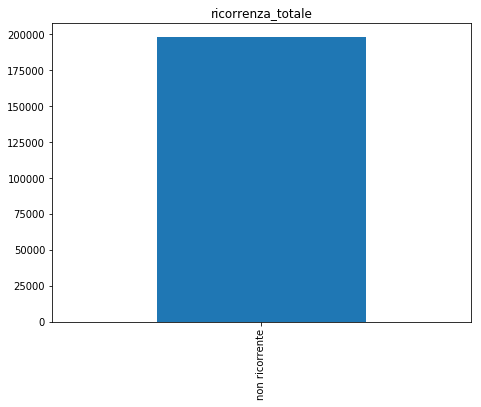

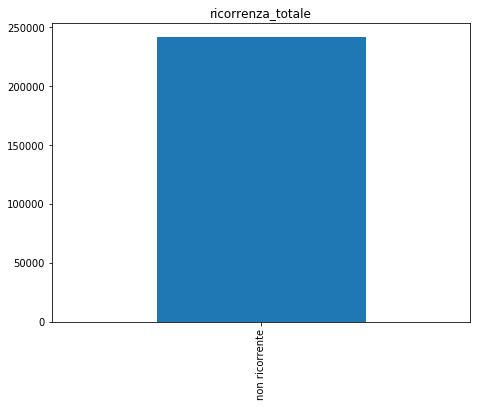

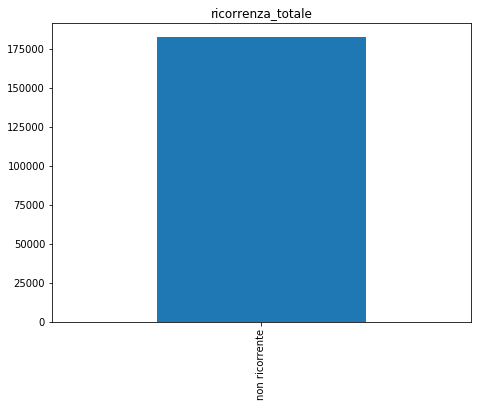

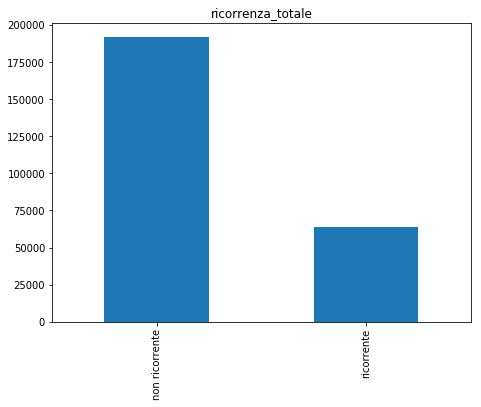

In [52]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['ricorrenza_totale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_totale')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_2_pd['ricorrenza_totale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_totale')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_6_pd['ricorrenza_totale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_totale')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_9_pd['ricorrenza_totale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_totale')
plt.show()

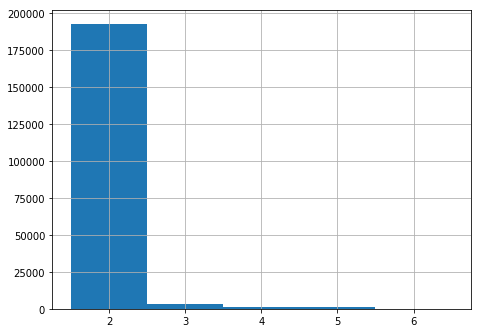

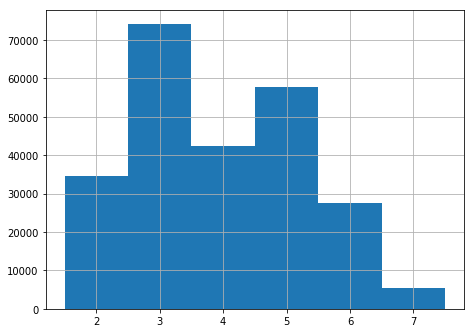

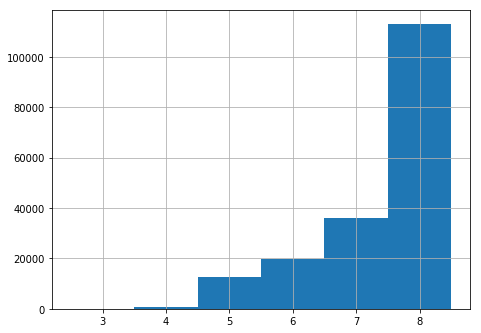

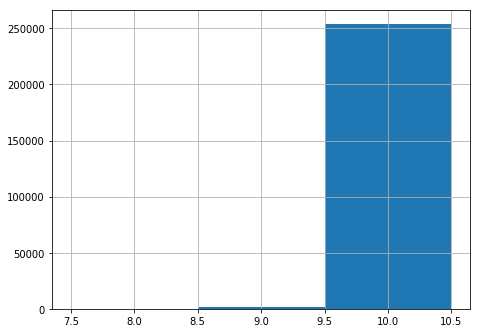

In [72]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.percentile_score_utilizzo, bins = np.arange(df_subset_0_pd.percentile_score_utilizzo.min(), df_subset_0_pd.percentile_score_utilizzo.max()+1,1),align='right')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_2_pd.percentile_score_utilizzo, bins = np.arange(df_subset_2_pd.percentile_score_utilizzo.min(), df_subset_2_pd.percentile_score_utilizzo.max()+1,1),align='right')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_6_pd.percentile_score_utilizzo, bins = np.arange(df_subset_6_pd.percentile_score_utilizzo.min(), df_subset_6_pd.percentile_score_utilizzo.max()+1,1),align='right')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_9_pd.percentile_score_utilizzo, bins = np.arange(df_subset_9_pd.percentile_score_utilizzo.min(), df_subset_9_pd.percentile_score_utilizzo.max()+1,1),align='right')
plt.show()

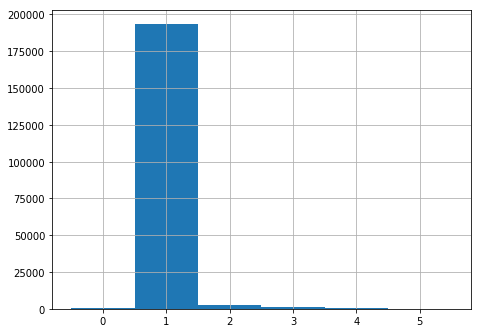

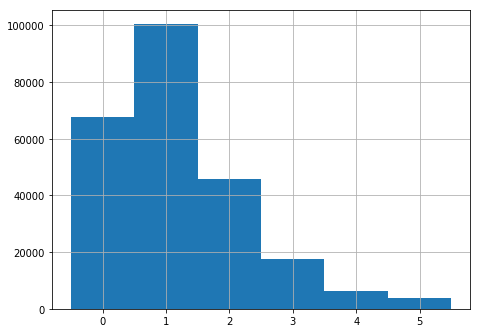

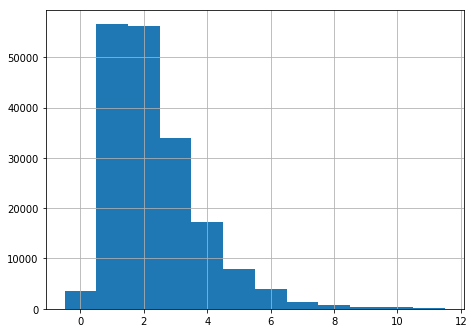

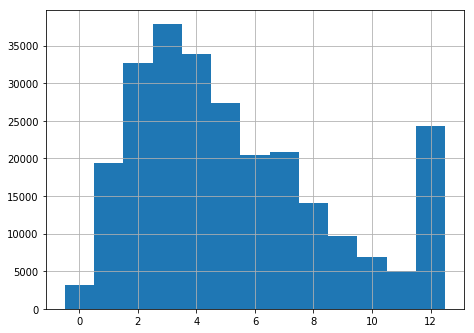

In [54]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.cookie_skyitdev, bins = np.arange(df_subset_0_pd.cookie_skyitdev.min(), df_subset_0_pd.cookie_skyitdev.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_2_pd.cookie_skyitdev, bins = np.arange(df_subset_2_pd.cookie_skyitdev.min(), df_subset_2_pd.cookie_skyitdev.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_6_pd.cookie_skyitdev, bins = np.arange(df_subset_6_pd.cookie_skyitdev.min(), df_subset_6_pd.cookie_skyitdev.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_9_pd.cookie_skyitdev, bins = np.arange(df_subset_9_pd.cookie_skyitdev.min(), df_subset_9_pd.cookie_skyitdev.max()+1,1),align='left')
plt.show()

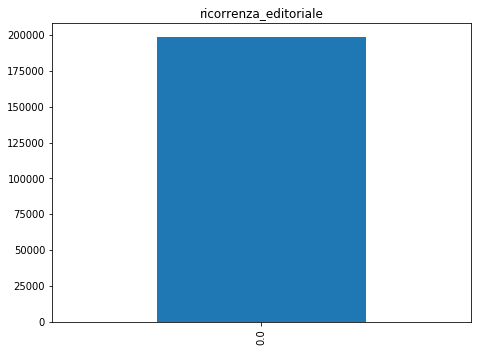

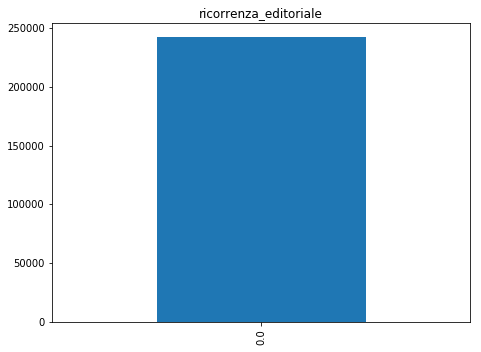

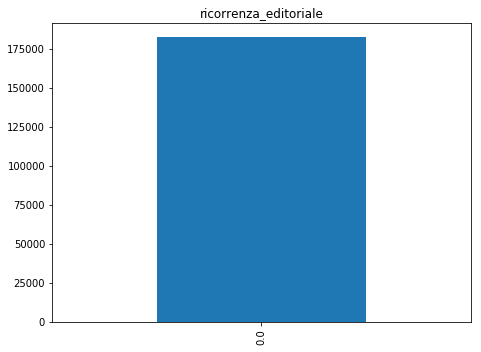

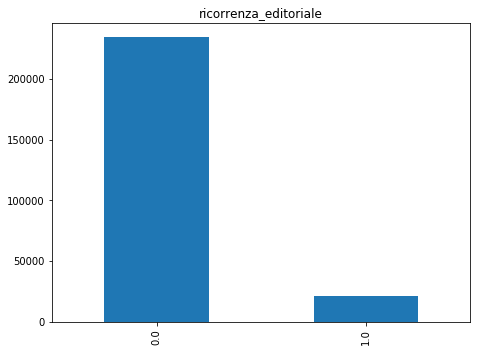

In [60]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['ricorrenza_editoriale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_editoriale')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_2_pd['ricorrenza_editoriale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_editoriale')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_6_pd['ricorrenza_editoriale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_editoriale')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_9_pd['ricorrenza_editoriale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_editoriale')
plt.show()

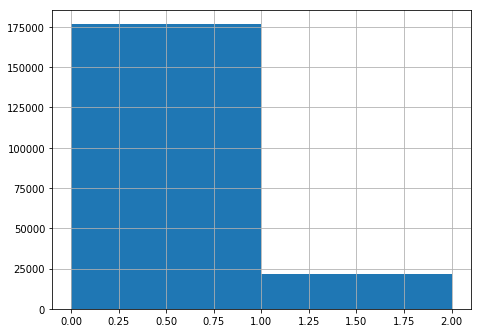

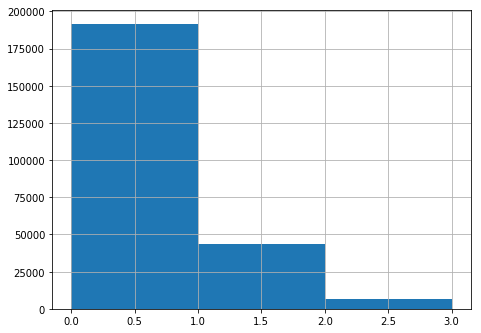

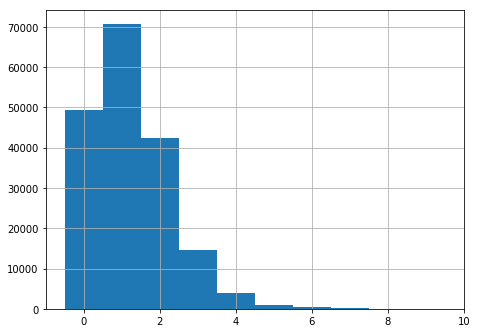

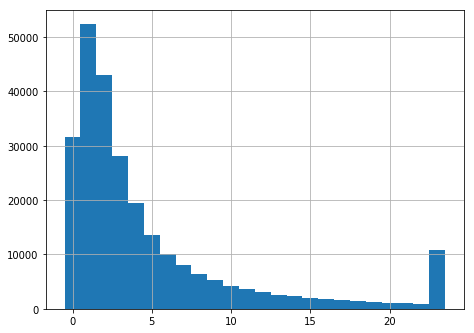

In [62]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.avg_visite_mese_editoriale, bins = np.arange(df_subset_0_pd.avg_visite_mese_editoriale.min(), df_subset_0_pd.avg_visite_mese_editoriale.max()+1,1),align='mid')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_2_pd.avg_visite_mese_editoriale, bins = np.arange(df_subset_2_pd.avg_visite_mese_editoriale.min(), df_subset_2_pd.avg_visite_mese_editoriale.max()+1,1),align='mid')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_6_pd.avg_visite_mese_editoriale, bins = np.arange(df_subset_6_pd.avg_visite_mese_editoriale.min(), df_subset_6_pd.avg_visite_mese_editoriale.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_9_pd.avg_visite_mese_editoriale, bins = np.arange(df_subset_9_pd.avg_visite_mese_editoriale.min(), df_subset_9_pd.avg_visite_mese_editoriale.max()+1,1),align='left')
plt.show()

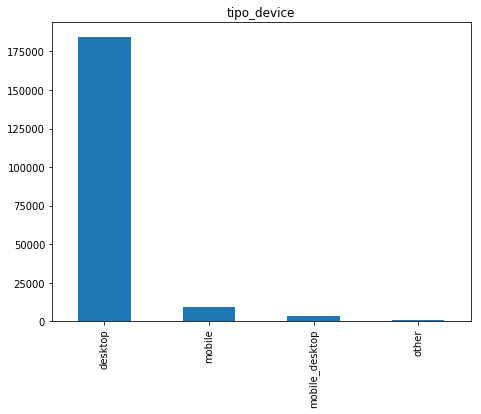

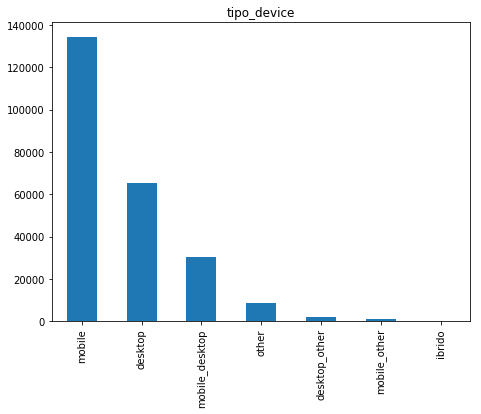

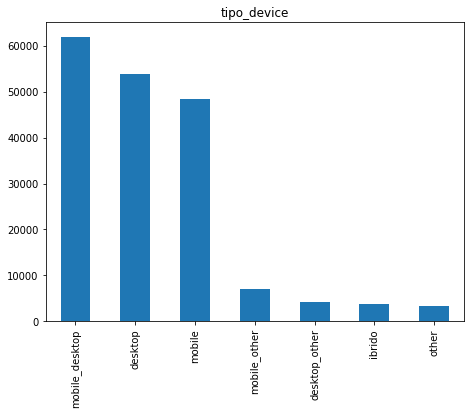

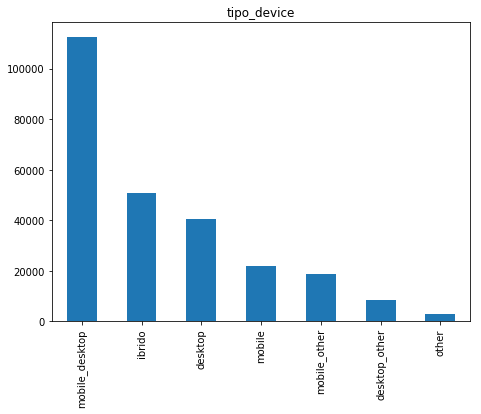

In [63]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['tipo_device'].value_counts().plot(kind='bar')
plt.title('tipo_device')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_2_pd['tipo_device'].value_counts().plot(kind='bar')
plt.title('tipo_device')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_6_pd['tipo_device'].value_counts().plot(kind='bar')
plt.title('tipo_device')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_9_pd['tipo_device'].value_counts().plot(kind='bar')
plt.title('tipo_device')
plt.show()

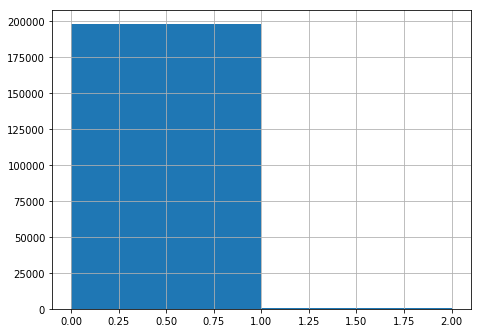

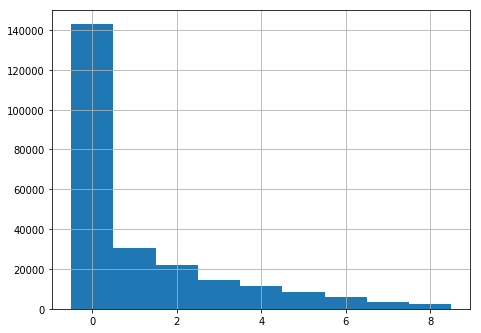

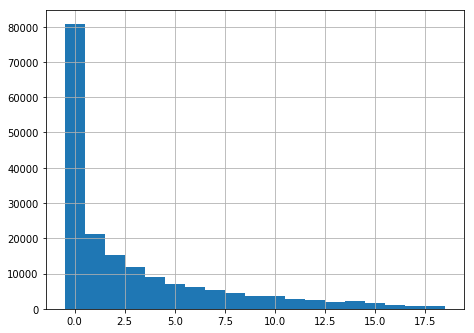

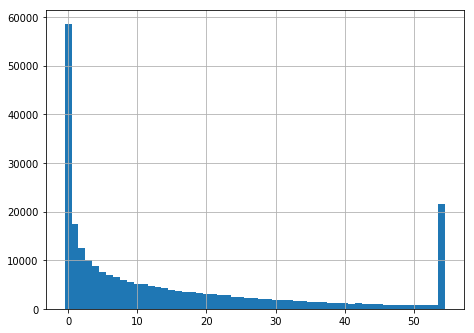

In [65]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.visite_app, bins = np.arange(df_subset_0_pd.visite_app.min(), df_subset_0_pd.visite_app.max()+1,1),align='mid')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_2_pd.visite_app, bins = np.arange(df_subset_2_pd.visite_app.min(), df_subset_2_pd.visite_app.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_6_pd.visite_app, bins = np.arange(df_subset_6_pd.visite_app.min(), df_subset_6_pd.visite_app.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_9_pd.visite_app, bins = np.arange(df_subset_9_pd.visite_app.min(), df_subset_9_pd.visite_app.max()+1,1),align='left')
plt.show()


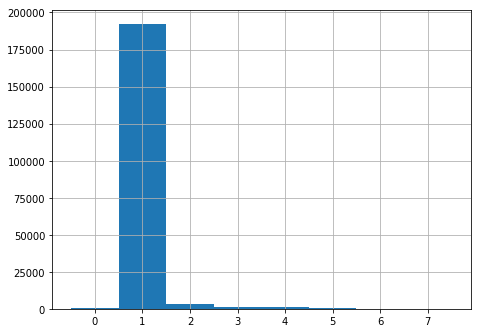

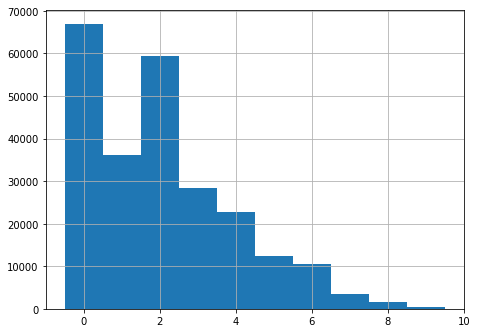

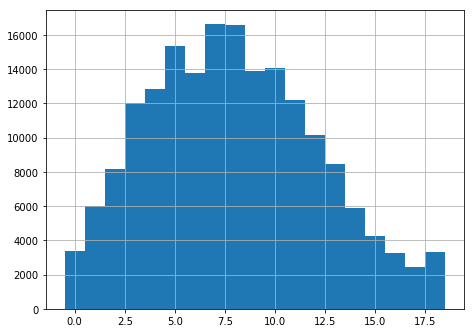

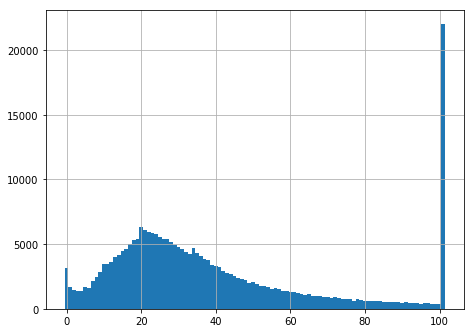

In [66]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.visite_web, bins = np.arange(df_subset_0_pd.visite_web.min(), df_subset_0_pd.visite_web.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_2_pd.visite_web, bins = np.arange(df_subset_2_pd.visite_web.min(), df_subset_2_pd.visite_web.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_6_pd.visite_web, bins = np.arange(df_subset_6_pd.visite_web.min(), df_subset_6_pd.visite_web.max()+1,1),align='left')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_9_pd.visite_web, bins = np.arange(df_subset_9_pd.visite_web.min(), df_subset_9_pd.visite_web.max()+1,1),align='left')
plt.show()


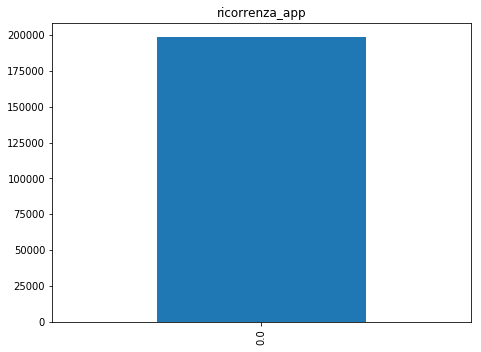

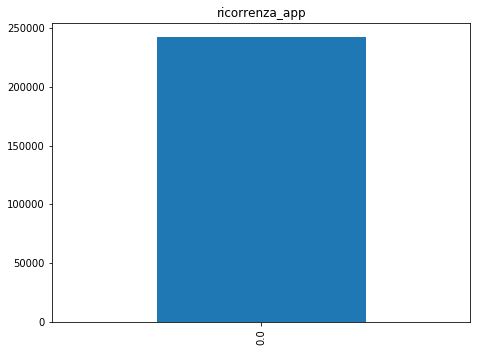

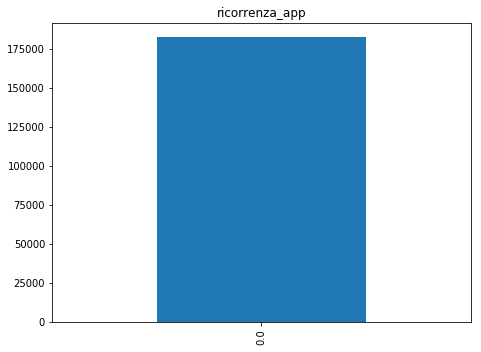

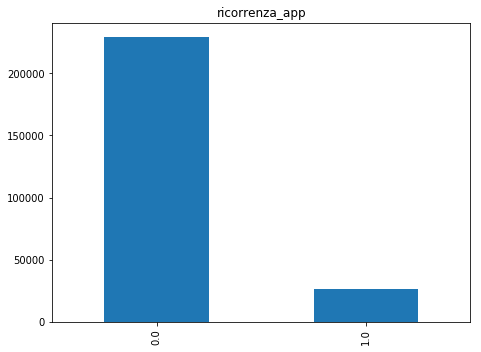

In [67]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['ricorrenza_app'].value_counts().plot(kind='bar')
plt.title('ricorrenza_app')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_2_pd['ricorrenza_app'].value_counts().plot(kind='bar')
plt.title('ricorrenza_app')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_6_pd['ricorrenza_app'].value_counts().plot(kind='bar')
plt.title('ricorrenza_app')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_9_pd['ricorrenza_app'].value_counts().plot(kind='bar')
plt.title('ricorrenza_app')
plt.show()

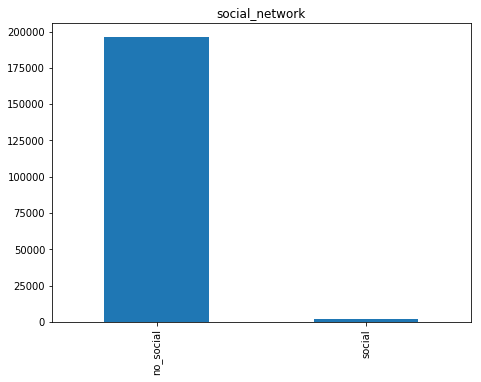

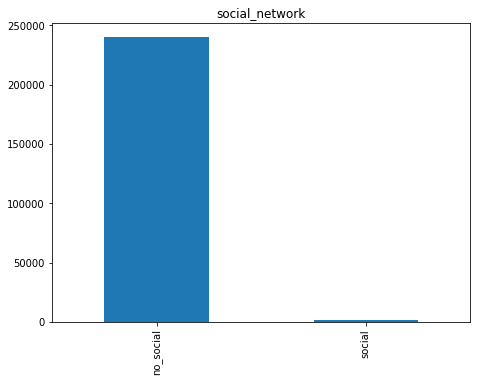

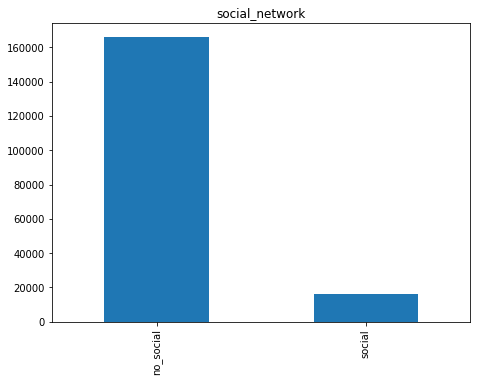

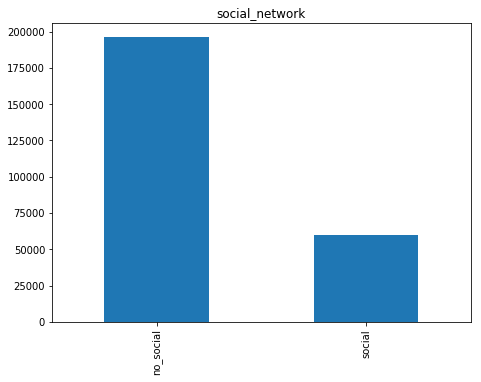

In [68]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['social_network'].value_counts().plot(kind='bar')
plt.title('social_network')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_2_pd['social_network'].value_counts().plot(kind='bar')
plt.title('social_network')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_6_pd['social_network'].value_counts().plot(kind='bar')
plt.title('social_network')
plt.show()

fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_9_pd['social_network'].value_counts().plot(kind='bar')
plt.title('social_network')
plt.show()

## Subset df con i classificati al decile 2


In [44]:
df_subset_2 = df_joined_2.select('ricorrenza_totale', 'percentile_score_utilizzo', 'cookie_skyitdev', 'ricorrenza_editoriale', 'avg_visite_mese_editoriale', 'tipo_device', 'visite_app', 'visite_web', 'ricorrenza_app', 'social_network', 'avg_visite_mese_app')

In [45]:
df_subset_2_pd = df_subset_2.toPandas()

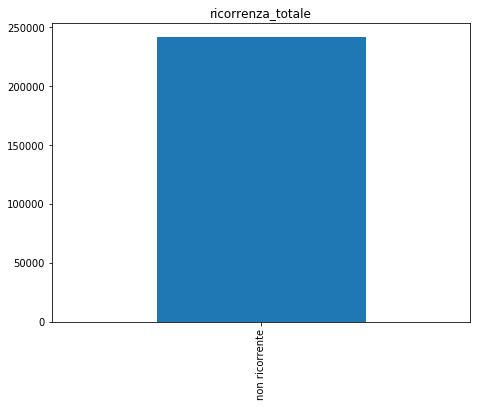

In [46]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_2_pd['ricorrenza_totale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_totale')
plt.show()

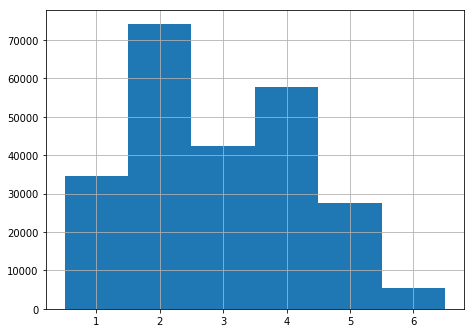

In [47]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
#ax.set_xticks(ticks=[1,2,3,4,5,6])

#ax.set_xticks(np.arange(df_subset_0.percentile_score_utilizzo.min(), df_subset_0.percentile_score_utilizzo.max()+1,1)) 
plt.hist(df_subset_2_pd.percentile_score_utilizzo, bins = np.arange(df_subset_2_pd.percentile_score_utilizzo.min(), df_subset_2_pd.percentile_score_utilizzo.max()+1,1),align='left')
plt.show()

#plt.hist(df_subset_0.percentile_score_utilizzo, bins = 10, range = (1,10), align='left', edgecolor = 'black')
#plt.title('percentile_score_utilizzo')
#plt.show()

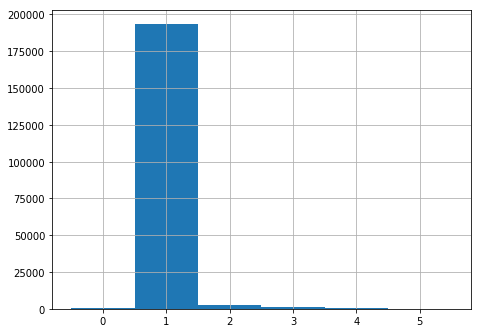

In [22]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.cookie_skyitdev, bins = np.arange(df_subset_0_pd.cookie_skyitdev.min(), df_subset_0_pd.cookie_skyitdev.max()+1,1),align='left')
plt.show()


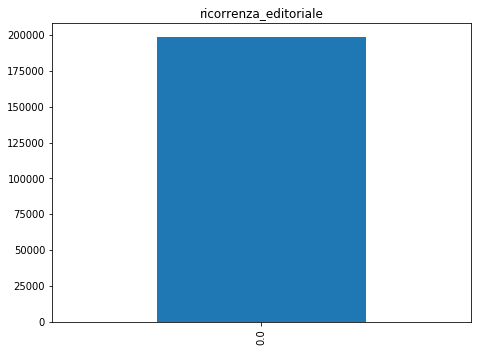

In [23]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['ricorrenza_editoriale'].value_counts().plot(kind='bar')
plt.title('ricorrenza_editoriale')
plt.show()

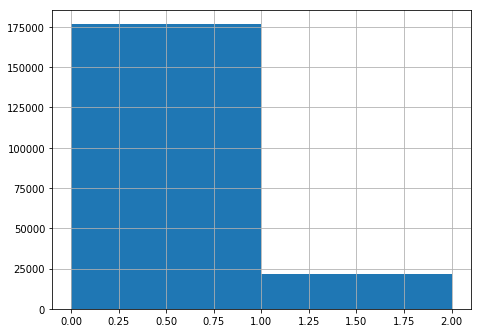

In [40]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.avg_visite_mese_editoriale, bins = np.arange(df_subset_0_pd.avg_visite_mese_editoriale.min(), df_subset_0_pd.avg_visite_mese_editoriale.max()+1,1),align='mid')
plt.show()


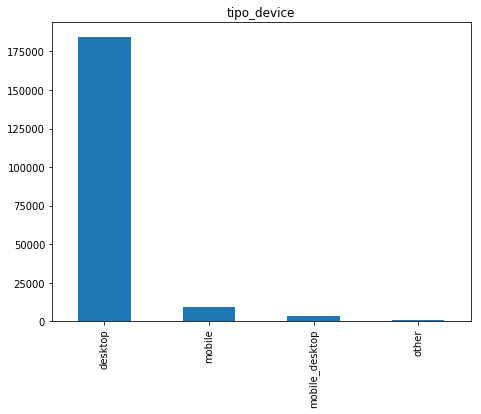

In [31]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['tipo_device'].value_counts().plot(kind='bar')
plt.title('tipo_device')
plt.show()

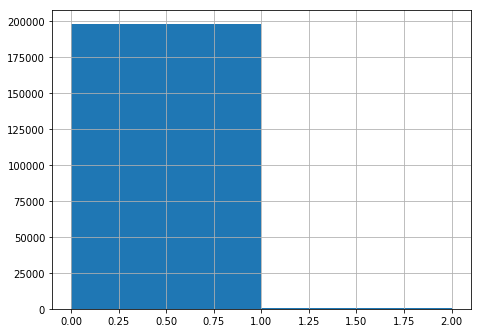

In [33]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.visite_app, bins = np.arange(df_subset_0_pd.visite_app.min(), df_subset_0_pd.visite_app.max()+1,1),align='mid')
plt.show()


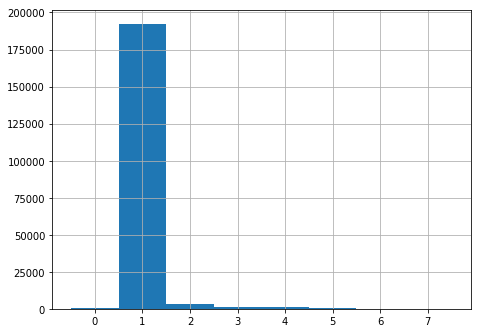

In [35]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.visite_web, bins = np.arange(df_subset_0_pd.visite_web.min(), df_subset_0_pd.visite_web.max()+1,1),align='left')
plt.show()

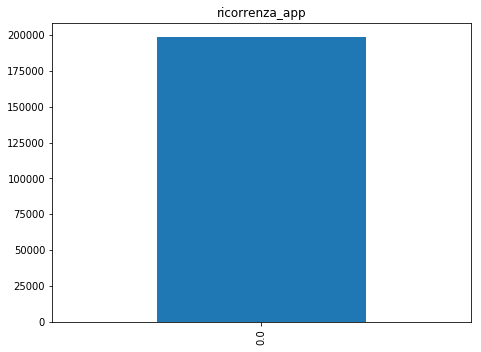

In [36]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['ricorrenza_app'].value_counts().plot(kind='bar')
plt.title('ricorrenza_app')
plt.show()

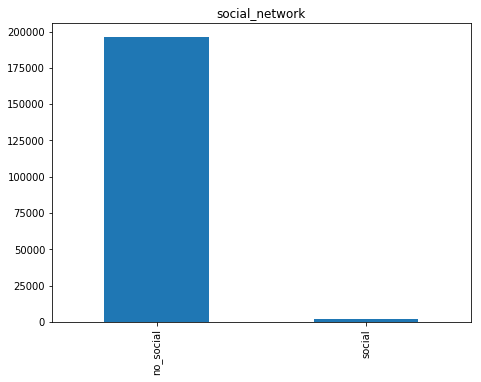

In [37]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
df_subset_0_pd['social_network'].value_counts().plot(kind='bar')
plt.title('social_network')
plt.show()

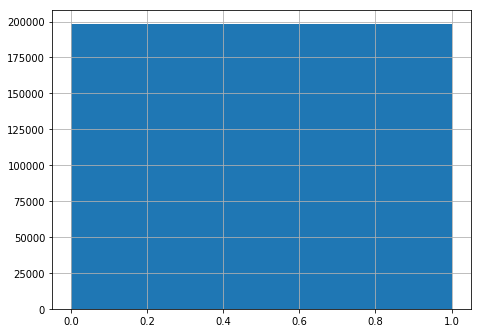

In [39]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
plt.hist(df_subset_0_pd.avg_visite_mese_app, bins = np.arange(df_subset_0_pd.avg_visite_mese_app.min(), df_subset_0_pd.avg_visite_mese_app.max()+1,1),align='mid')
plt.show()



## Regression

In [ ]:
#Creo il modello:
rf_reg = RandomForestRegressor(labelCol="label", featuresCol="features", numTrees=20, maxDepth = 5)

In [ ]:
# Run model:
model2 =rf_reg.fit(training)
predictions2 = model2.transform(validation)

In [ ]:
# Print degli alberi:
print(model2.toDebugString)

In [ ]:
#RMSE:
evaluator = RegressionEvaluator()
evaluator.evaluate(predictions2)

### Test finale regression

In [ ]:
predictions_final = model2.transform(final)

In [ ]:
importance= model2.featureImportances
print(importance)

In [ ]:
# REGRESSION. FEATURE IMPORTANCE
ExtractFeatureImp(importance, training, "features")

In [ ]:
predictions_final.select("features","prediction").show(100,False)

In [ ]:
predictions_final.createOrReplaceTempView('final')

In [ ]:
probab_reg = spark.sql('SELECT prediction, COUNT(features) AS count_ext_id FROM final GROUP BY prediction ORDER BY count_ext_id DESC')

In [ ]:
# REGRESSION. DISTRIBUTION OF PROBABILITY
probab_reg.show(1000,False)